<a href="https://colab.research.google.com/github/Starlight0901/Adult-Census-Income-Prediction/blob/main/ML_CW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducing the Dataset**

In [1]:
%pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.style.use('dark_background')

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [5]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [6]:
X["income"] = y
df = X
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
df["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [8]:
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

### **Check for missing values and values with "?"**

In [9]:
missing_values = df.isnull()
missing_values.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
print(missing_values.sum())

total = missing_values.sum().sum()
print("Total missing values = ", total)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
Total missing values =  2203


In [11]:
rows_with_missing_values = df[missing_values.any(axis=1)]
rows_with_missing_values

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K


In [12]:
import numpy as np


# Count "?" values for each column
question_mark_counts = df.eq("?").sum()
print(question_mark_counts)

# Sum the counts across all columns
total_question_marks = question_mark_counts.sum()

print(f"Total number of '?' values in the DataFrame: {total_question_marks}")

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Total number of '?' values in the DataFrame: 4262


In [13]:
df.replace('?', np.NaN,inplace = True)

In [14]:
total_empty_values = df.isnull().sum()
total_empty_values

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [15]:
total_empty_values.sum()

6465

### **Replace all the missing values with the mode**

In [16]:
# Fill missing values with the mode of each column
df_filled = df.fillna(df.mode().iloc[0])

# Check if there are any missing values left
print(df_filled.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [17]:
df_filled.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Data Visualization**

In [18]:
numerical_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "income"]
numerical_data_df = df[numerical_columns].copy()
numerical_data_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K


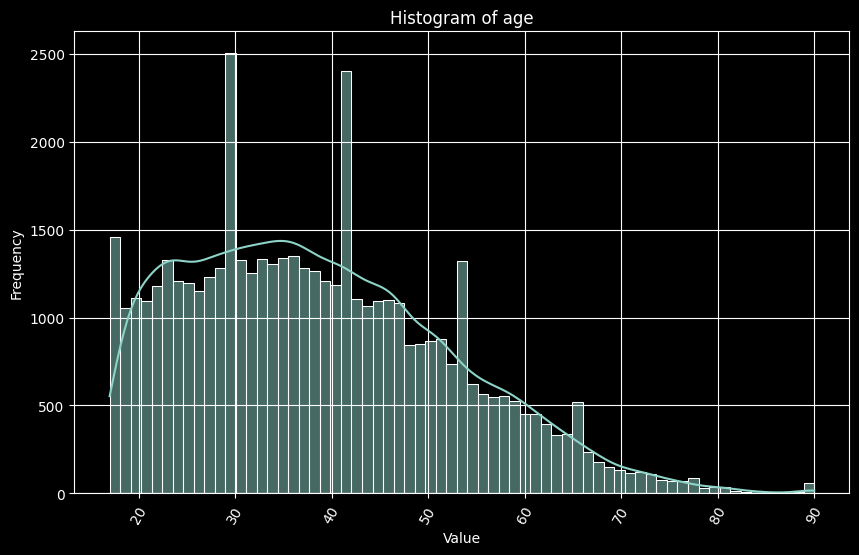

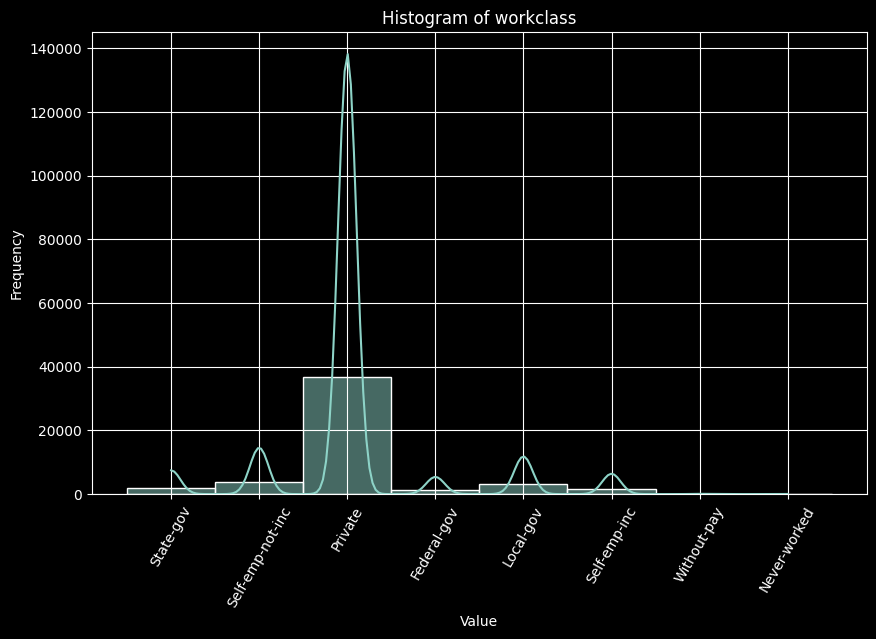

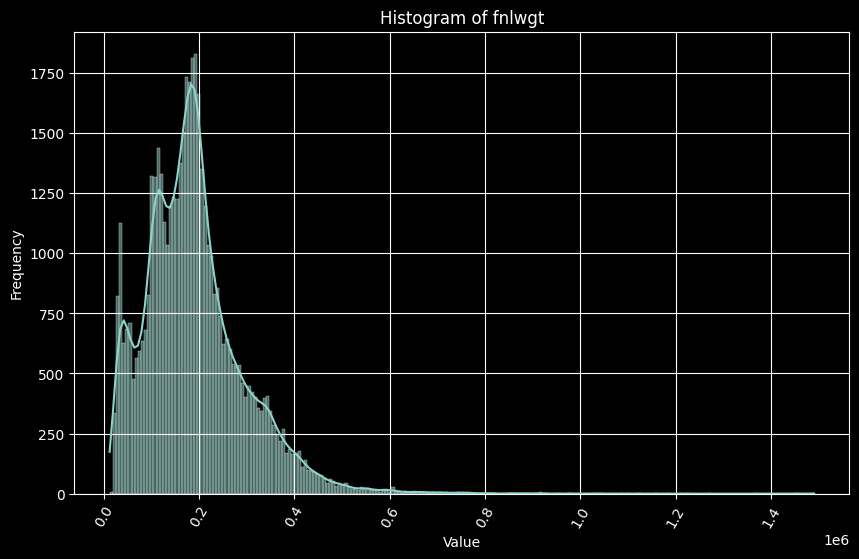

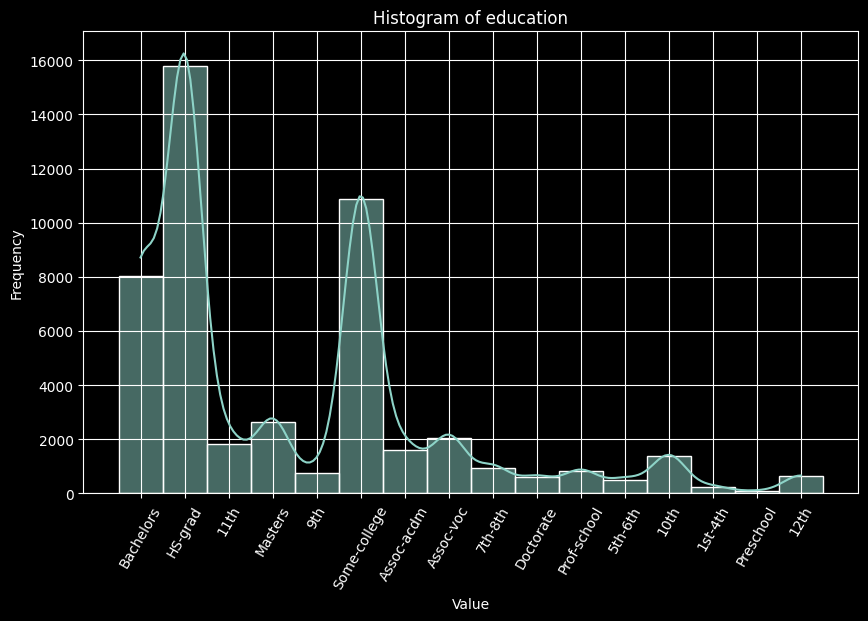

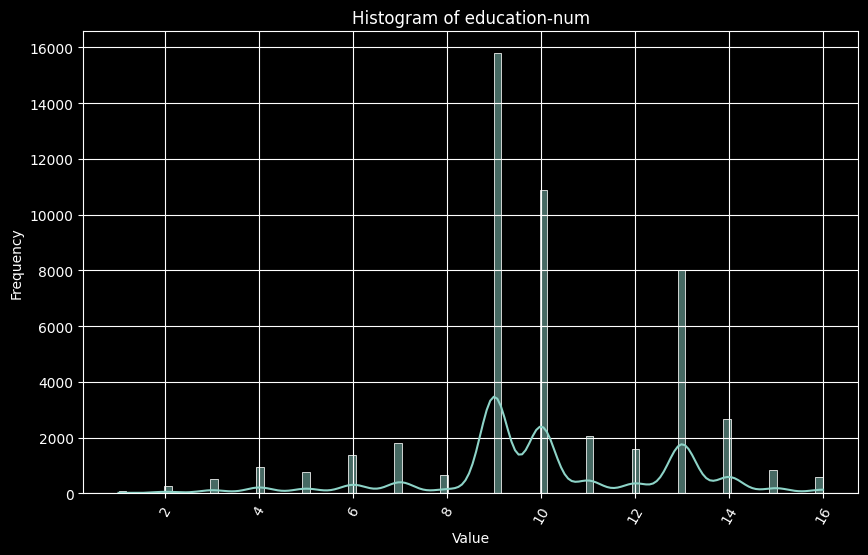

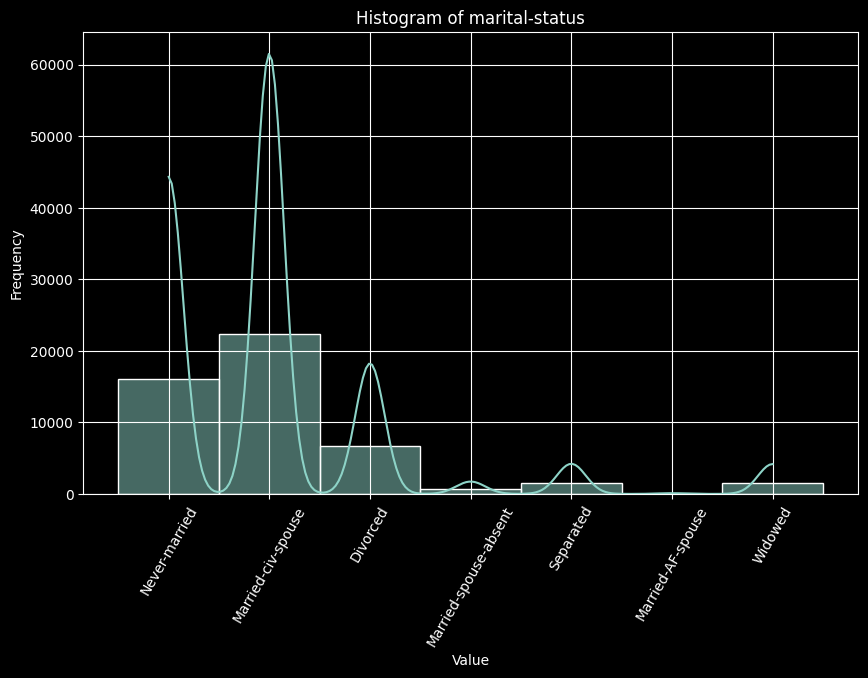

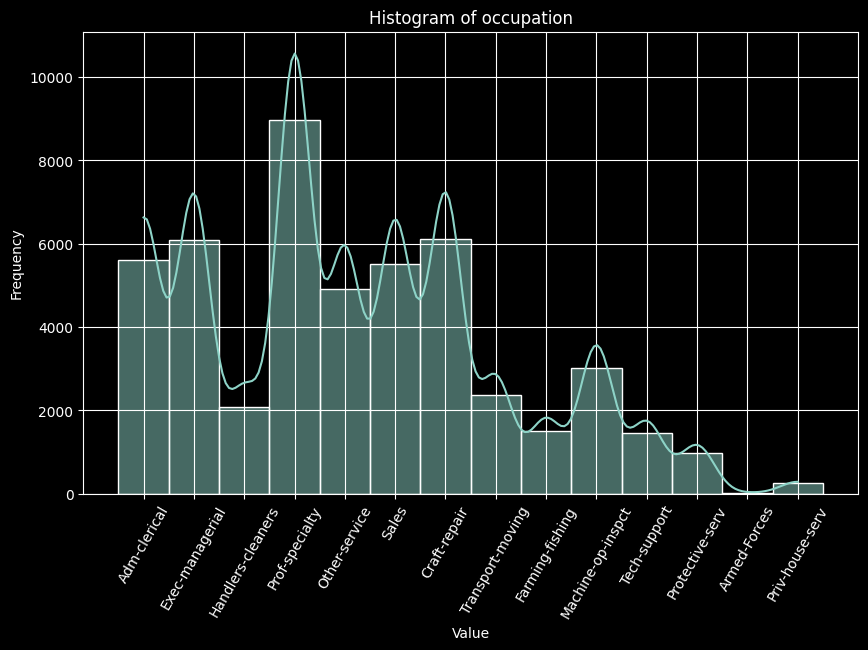

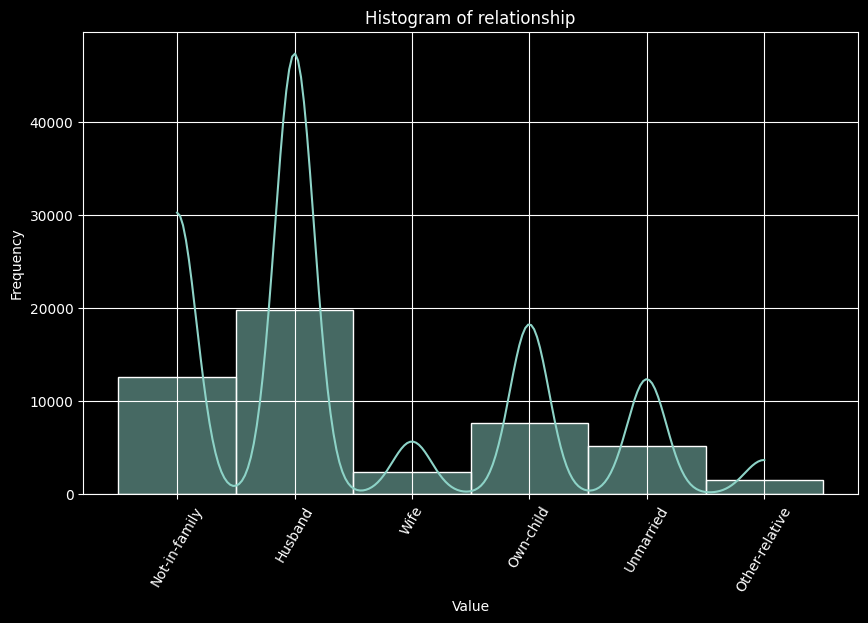

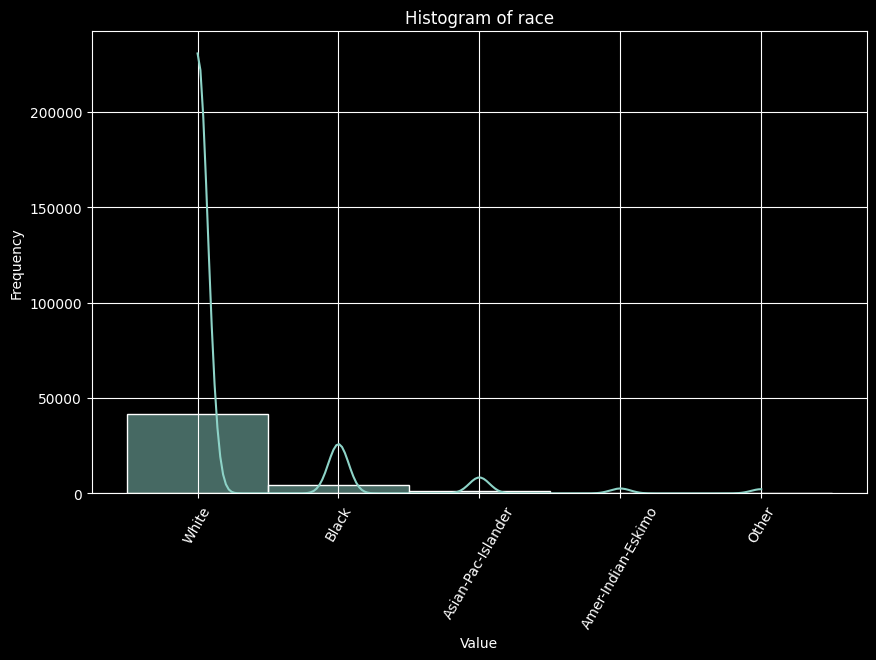

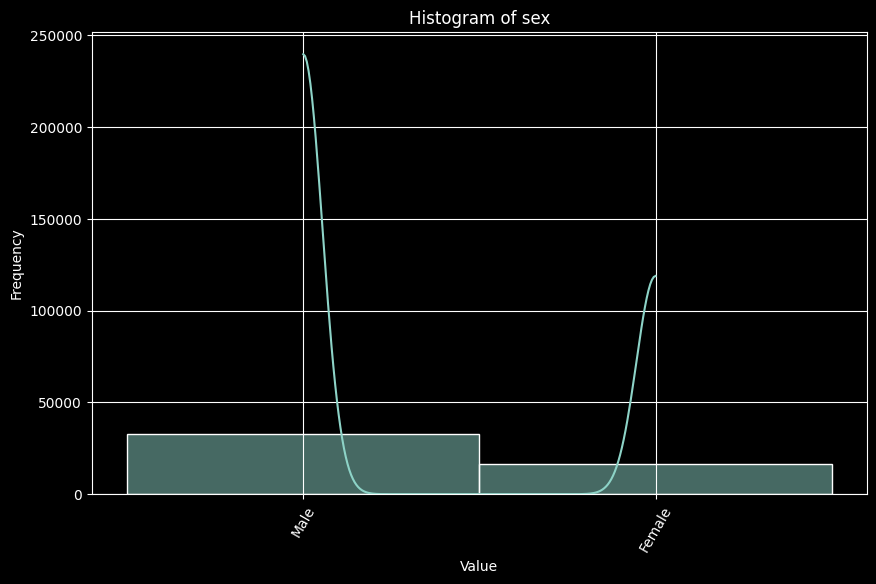

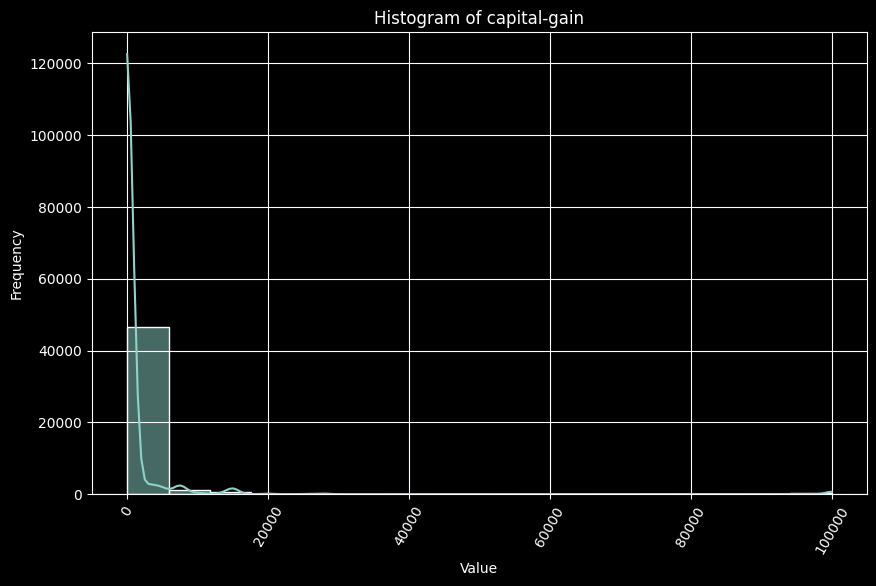

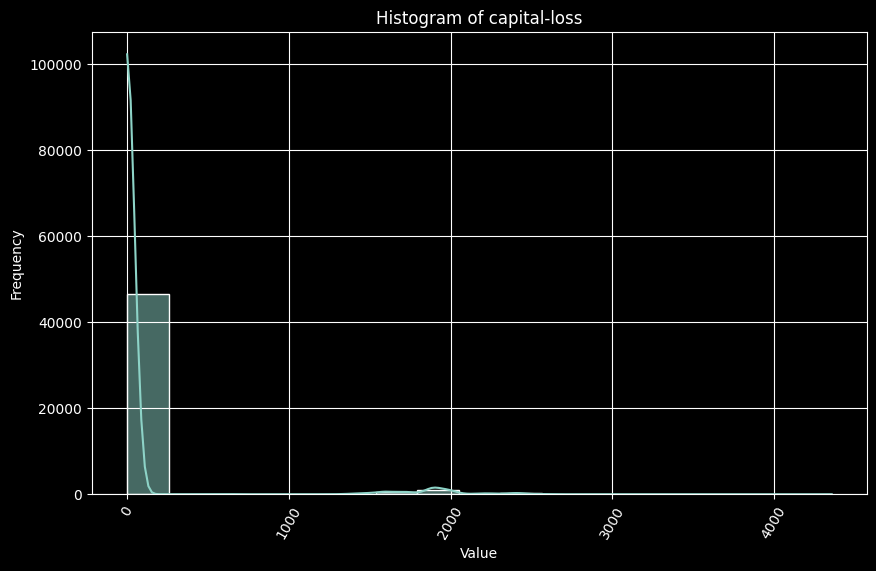

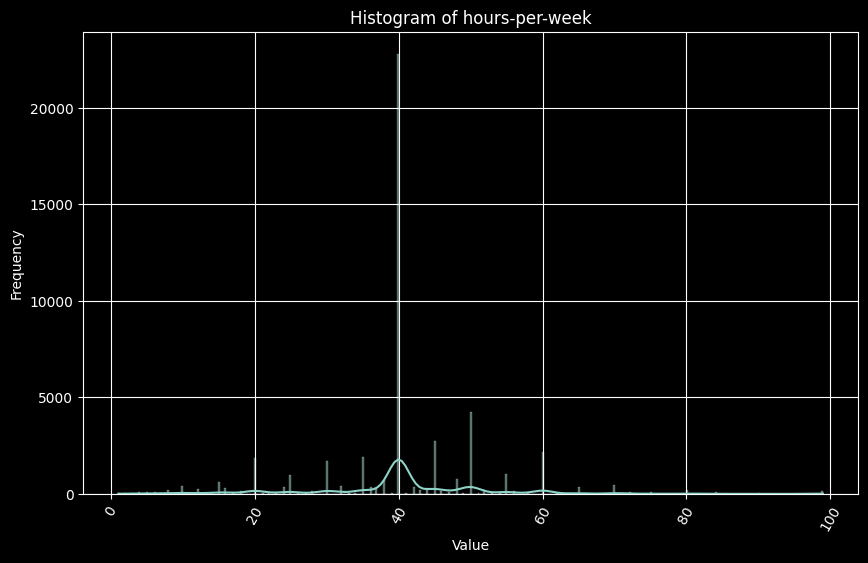

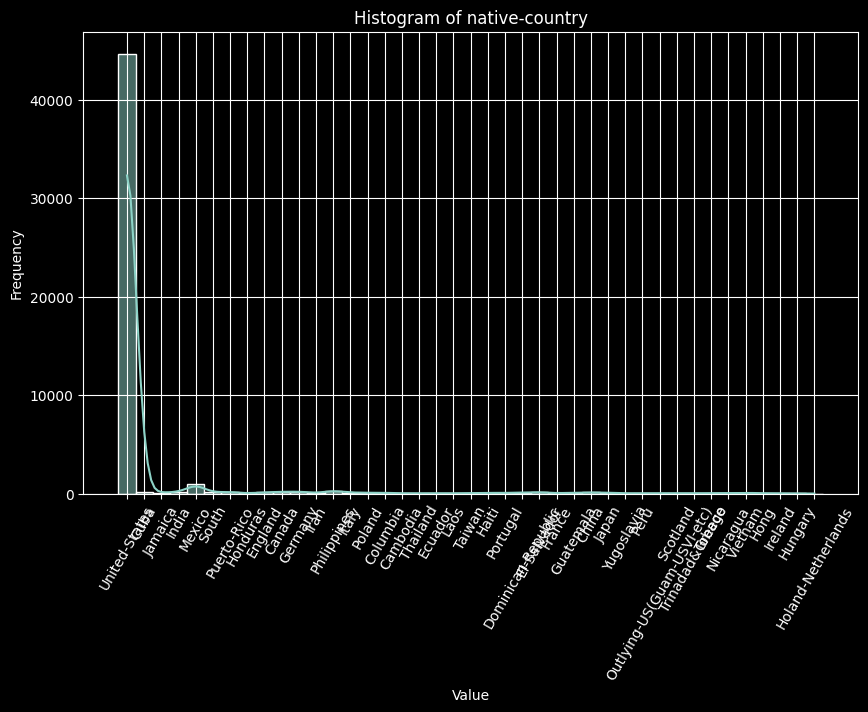

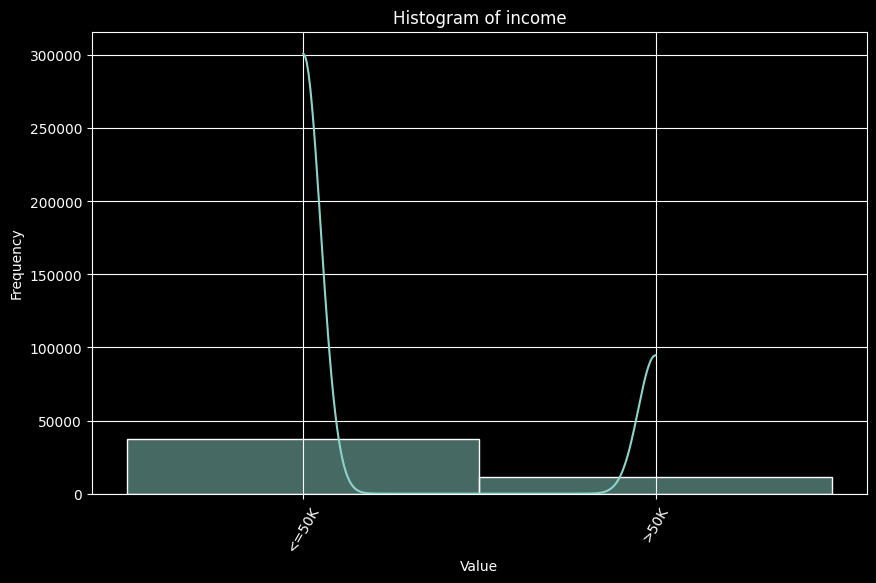

In [19]:
for column in df_filled.columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.histplot(data=df_filled, x=f'{column}', kde=True)
    #df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.grid(True)
    plt.show()

Checking for existing correlation before feature re-engineering

In [20]:
correlation_df = df_filled.copy()
correlation_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


<ipython-input-21-f03d49dfb514>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


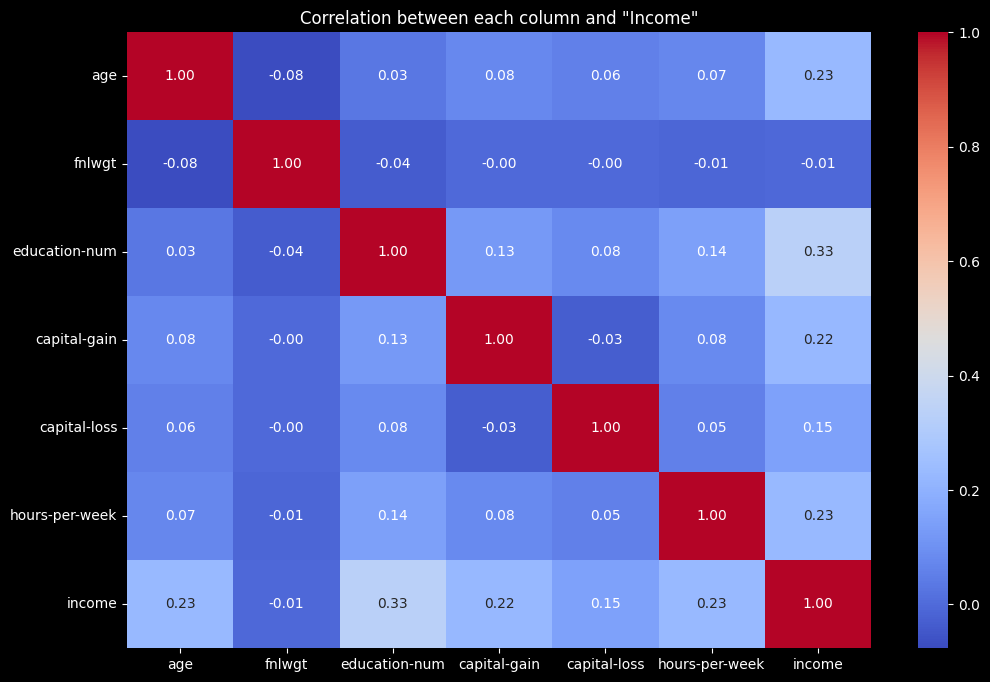

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
correlation_df['income'] = le.fit_transform(correlation_df['income'])

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extract correlations with the "income" column
income_correlation = correlation_matrix['income']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

correlation_df['age'] = le.fit_transform(correlation_df['age'])
correlation_df['workclass'] = le.fit_transform(correlation_df['workclass'])
correlation_df['fnlwgt'] = le.fit_transform(correlation_df['fnlwgt'])
correlation_df['education'] = le.fit_transform(correlation_df['education'])
correlation_df['education-num'] = le.fit_transform(correlation_df['education-num'])
correlation_df['marital-status'] = le.fit_transform(correlation_df['marital-status'])
correlation_df['occupation'] = le.fit_transform(correlation_df['occupation'])
correlation_df['relationship'] = le.fit_transform(correlation_df['relationship'])
correlation_df['race'] = le.fit_transform(correlation_df['race'])
correlation_df['sex'] = le.fit_transform(correlation_df['sex'])
#correlation_df['capital-gain'] = le.fit_transform(correlation_df['capital-gain'])
#correlation_df['capital-loss'] = le.fit_transform(correlation_df['capital-loss'])
#correlation_df['hours-per-week'] = le.fit_transform(correlation_df['hours-per-week'])
correlation_df['native-country'] = le.fit_transform(correlation_df['native-country'])
correlation_df['income'] = le.fit_transform(correlation_df['income'])

correlation_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,9,12,4,0,1,4,1,2174,0,40,38,0
1,33,5,3788,9,12,2,3,0,4,1,0,0,13,38,0
2,21,3,18342,11,8,0,5,1,4,1,0,0,40,38,0
3,36,3,19995,1,6,2,5,0,2,1,0,0,40,38,0
4,11,3,25405,9,12,2,9,5,2,0,0,0,40,4,0
5,20,3,23149,12,13,2,3,5,4,0,0,0,40,38,0
6,32,3,11187,6,4,3,7,1,2,0,0,0,16,22,0
7,35,5,17735,11,8,2,3,0,4,1,0,0,45,38,1
8,14,3,1679,12,13,4,9,1,4,0,14084,0,50,38,1
9,25,3,11093,9,12,2,3,0,4,1,5178,0,40,38,1


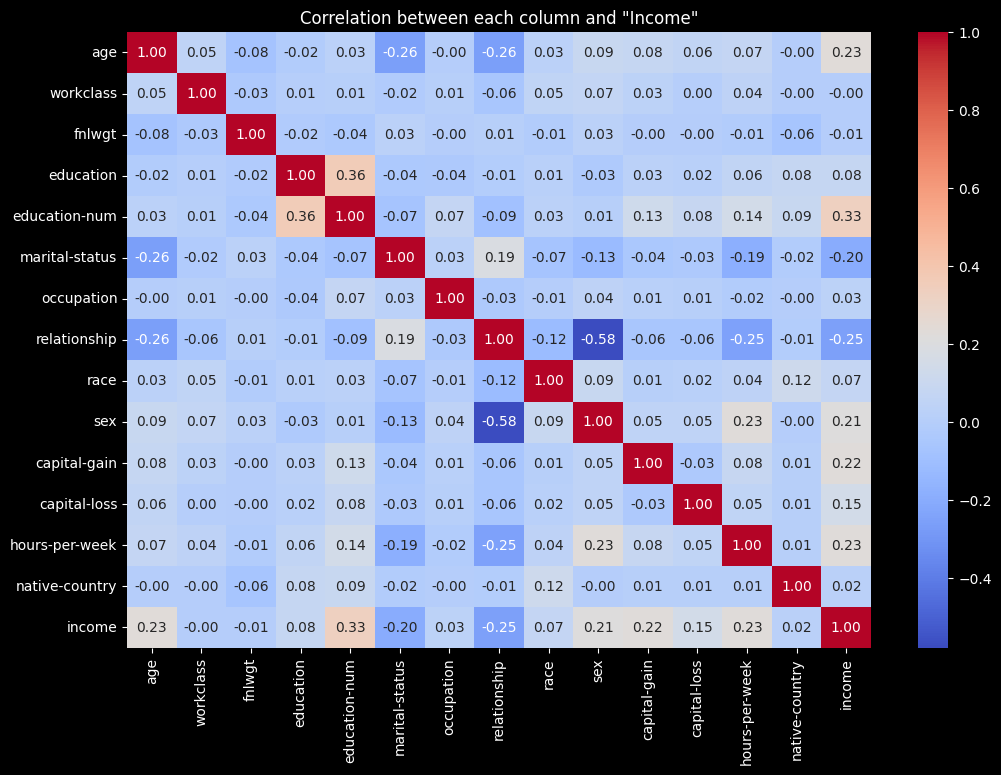

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()


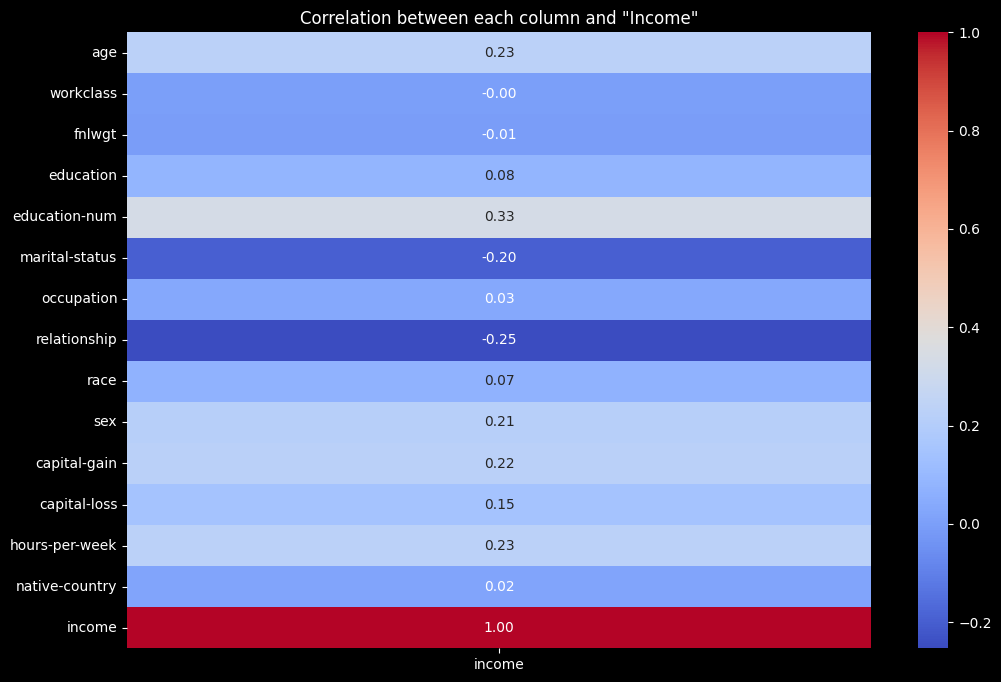

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract correlations with the "income" column
income_correlation = correlation_matrix['income']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(income_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()


### **Identifying and handling outliers**

**Age**

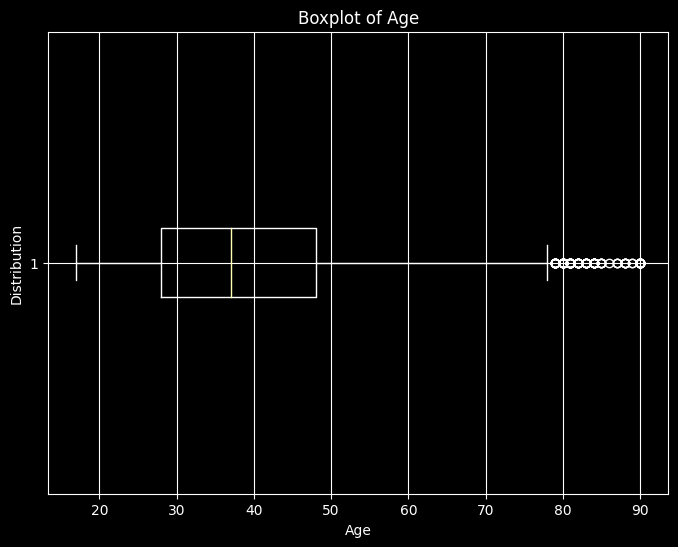

Minimum age: 17
Maximum age: 90


In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_age = df_filled['age'].min()
max_age = df_filled['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

In [26]:
# Calculate quartiles
Q1 = df_filled['age'].quantile(0.25)
Q3 = df_filled['age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_age = df_filled[(df_filled['age'] < lower_bound) | (df_filled['age'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("No of outliers: ", outliers_age.shape)
print("Identified outliers:")
outliers_age

Lower bound for outliers: -2.0
Upper bound for outliers: 78.0
No of outliers:  (216, 15)
Identified outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,Private,107762,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48524,80,Private,107740,HS-grad,9,Widowed,Handlers-cleaners,Not-in-family,White,Male,0,0,30,United-States,<=50K
48564,80,Self-emp-not-inc,29441,7th-8th,4,Married-spouse-absent,Farming-fishing,Unmarried,White,Male,0,0,15,United-States,<=50K
48667,83,Private,192305,Some-college,10,Divorced,Prof-specialty,Unmarried,White,Female,0,0,20,United-States,<=50K
48709,79,Local-gov,132668,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,15,United-States,<=50K


In [27]:
# Drop identified outliers from the DataFrame
df_filled = df_filled.drop(outliers_age.index)

# Print the DataFrame without outliers
print("DataFrame without outliers:")
df_filled


DataFrame without outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


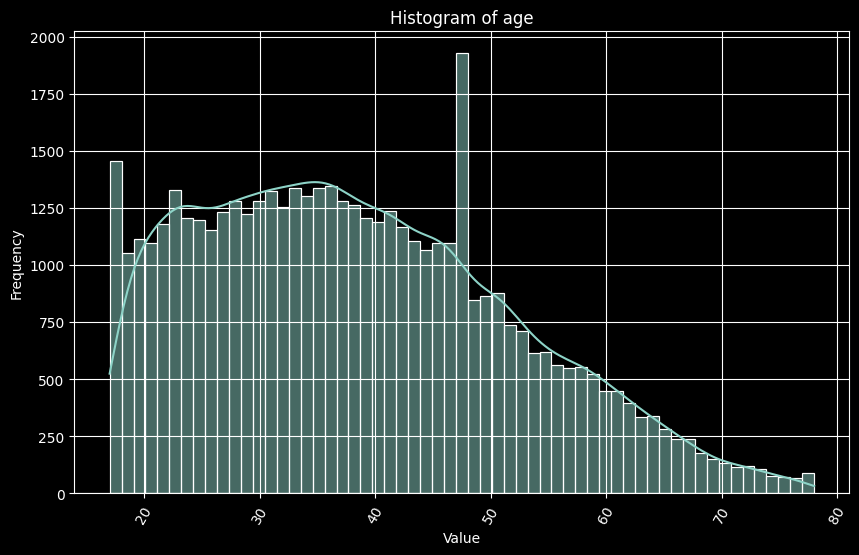

In [28]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=df_filled, x='age', kde=True)
#df[column].hist()
plt.title(f'Histogram of age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

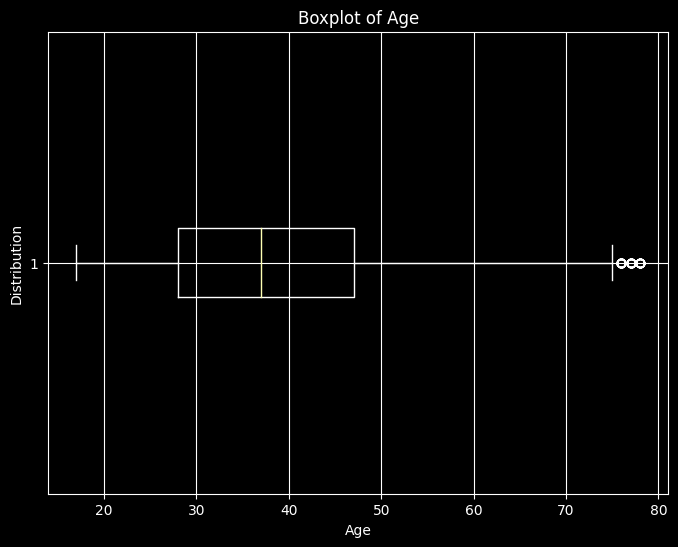

Minimum age: 17
Maximum age: 78


In [29]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_age = df_filled['age'].min()
max_age = df_filled['age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

**fnlwgt**

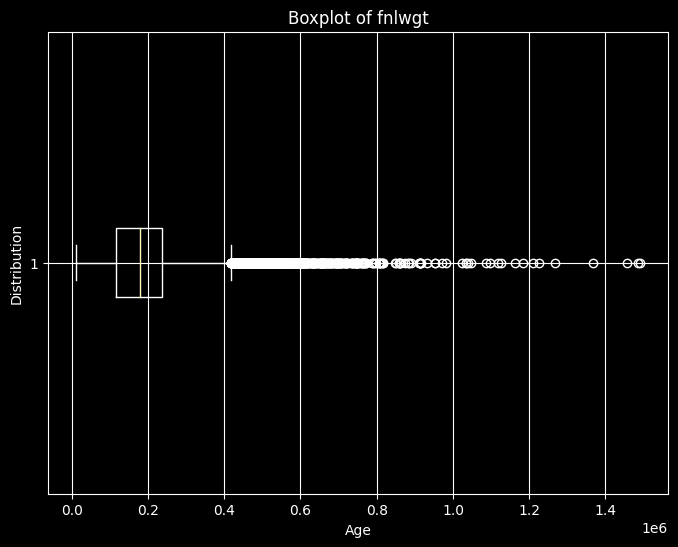

Minimum fnlwgt: 12285
Maximum fnlwgt: 1490400


In [30]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['fnlwgt'], vert=False)
plt.title('Boxplot of fnlwgt')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_fnlwgt = df_filled['fnlwgt'].min()
max_fnlwgt = df_filled['fnlwgt'].max()

print("Minimum fnlwgt:", min_fnlwgt)
print("Maximum fnlwgt:", max_fnlwgt)

In [31]:
# Calculate quartiles
Q1 = df_filled['fnlwgt'].quantile(0.25)
Q3 = df_filled['fnlwgt'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_fnlwgt = df_filled[(df_filled['fnlwgt'] < lower_bound) | (df_filled['fnlwgt'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("No of outliers: ", outliers_fnlwgt.shape)
print("Identified outliers:")
outliers_fnlwgt

Lower bound for outliers: -62701.5
Upper bound for outliers: 418118.5
No of outliers:  (1450, 15)
Identified outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K
110,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48677,18,State-gov,427515,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Female,0,0,20,United-States,<=50K
48734,27,Private,607658,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
48740,37,Private,422933,Masters,14,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,>50K
48821,27,Private,430340,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,45,United-States,<=50K


In [32]:
# Drop identified outliers from the DataFrame
df_filled = df_filled.drop(outliers_fnlwgt.index)

# Print the DataFrame without outliers
print("DataFrame without outliers:")
df_filled

DataFrame without outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


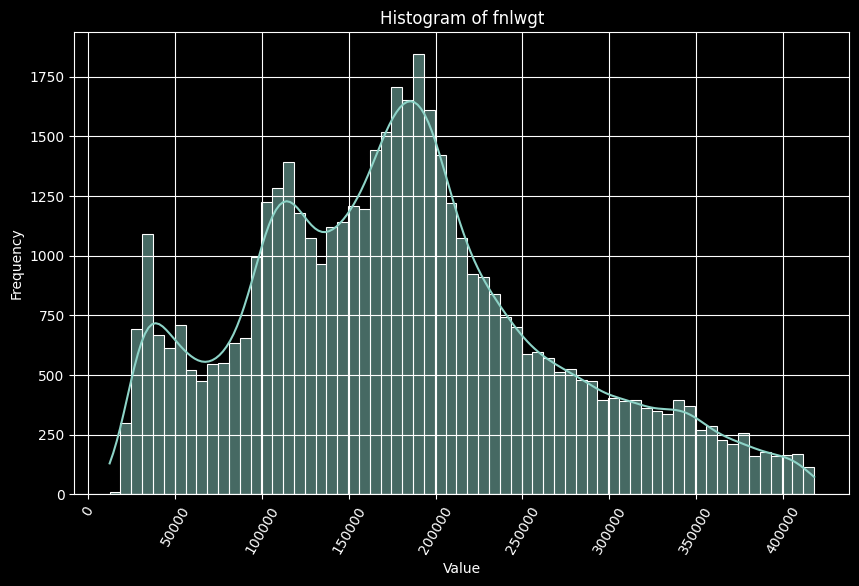

In [33]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=df_filled, x='fnlwgt', kde=True)
#df[column].hist()
plt.title(f'Histogram of fnlwgt')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

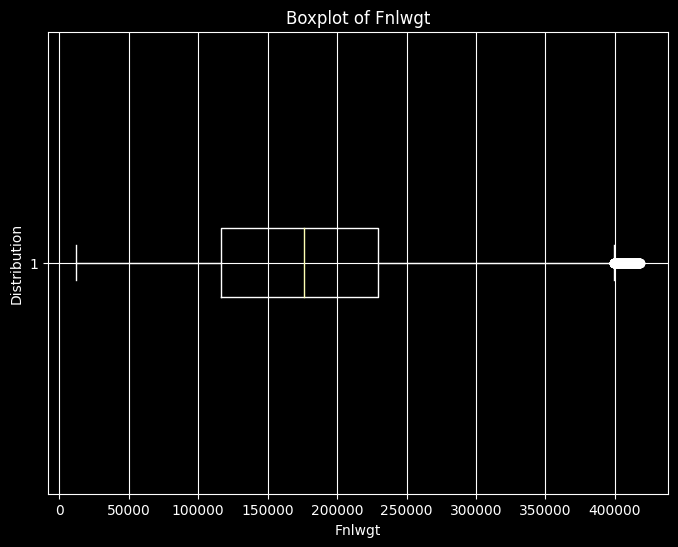

Minimum fnlwgt: 12285
Maximum fnlwgt: 418020


In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['fnlwgt'], vert=False)
plt.title('Boxplot of Fnlwgt')
plt.xlabel('Fnlwgt')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_fnlwgt = df_filled['fnlwgt'].min()
max_fnlwgt = df_filled['fnlwgt'].max()

print("Minimum fnlwgt:", min_fnlwgt)
print("Maximum fnlwgt:", max_fnlwgt)

**Capital Gain**

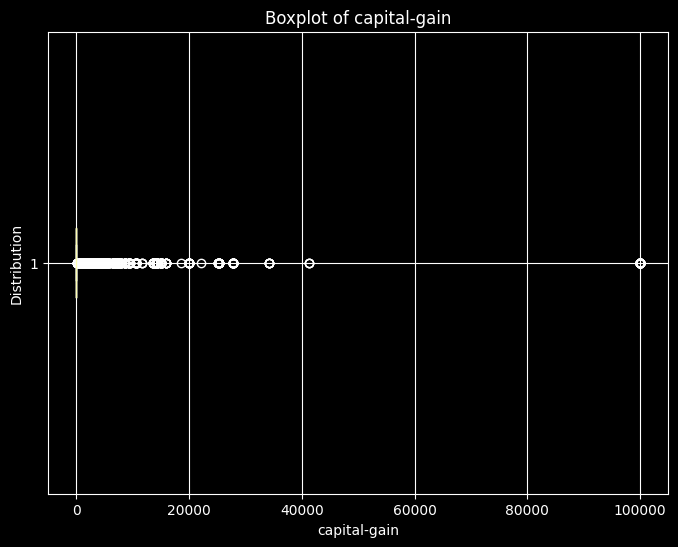

Minimum capital-gain: 0
Maximum capital-gain: 99999


In [35]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['capital-gain'], vert=False)
plt.title('Boxplot of capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_capital_gain = df_filled['capital-gain'].min()
max_capital_gain = df_filled['capital-gain'].max()

print("Minimum capital-gain:", min_capital_gain)
print("Maximum capital-gain:", max_capital_gain)

In [36]:
# Calculate quartiles
Q1 = df_filled['capital-gain'].quantile(0.25)
Q3 = df_filled['capital-gain'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_capital_gain = df_filled[(df_filled['capital-gain'] < lower_bound) | (df_filled['capital-gain'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("No of outliers: ", outliers_capital_gain.shape)
print("Identified outliers:")
outliers_capital_gain

Lower bound for outliers: 0.0
Upper bound for outliers: 0.0
No of outliers:  (3888, 15)
Identified outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48801,57,Private,161944,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,>50K
48805,32,Private,24529,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,5178,0,60,United-States,>50K
48813,60,Private,117909,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
48822,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K


In [37]:
# Drop identified outliers from the DataFrame
#df_without_outliers_capital_gain = df_filled.drop(outliers_capital_gain.index)

# Print the DataFrame without outliers
#print("DataFrame without outliers:")
#df_without_outliers_capital_gain

In [38]:
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#sns.histplot(data=df_without_outliers_capital_gain, x='capital-gain', kde=True)
#df[column].hist()
#plt.title(f'Histogram of capital gain')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.xticks(rotation=60)
#plt.grid(True)
#plt.show()

In [39]:
#plt.figure(figsize=(8, 6))
#plt.boxplot(df_without_outliers_capital_gain['capital-gain'], vert=False)
#plt.title('Boxplot of capital gain')
#plt.xlabel('capital gain')
#plt.ylabel('Distribution')
#plt.grid(True)
#plt.show()

# Calculate min and max
#min_capital_gain = df_without_outliers_capital_gain['capital-gain'].min()
#max_capital_gain = df_without_outliers_capital_gain['capital-gain'].max()

#print("Minimum capital gain:", min_capital_gain)
#print("Maximum capital gain:", max_capital_gain)

**Capital Loss**

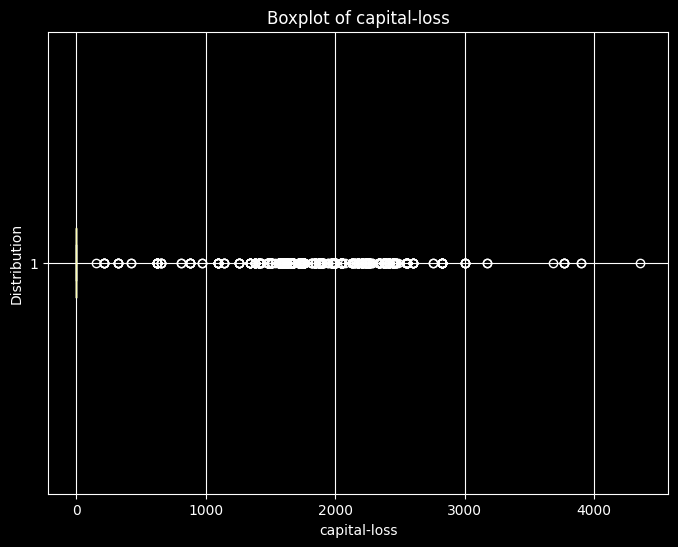

Minimum capital loss: 0
Maximum capital loss: 4356


In [40]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['capital-loss'], vert=False)
plt.title('Boxplot of capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_capital_loss = df_filled['capital-loss'].min()
max_capital_loss = df_filled['capital-loss'].max()

print("Minimum capital loss:", min_capital_loss)
print("Maximum capital loss:", max_capital_loss)

In [41]:
# Calculate quartiles
Q1 = df_filled['capital-loss'].quantile(0.25)
Q3 = df_filled['capital-loss'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_capital_loss = df_filled[(df_filled['capital-loss'] < lower_bound) | (df_filled['capital-loss'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("No of outliers: ", outliers_capital_loss.shape)
print("Identified outliers:")
outliers_capital_loss

Lower bound for outliers: 0.0
Upper bound for outliers: 0.0
No of outliers:  (2223, 15)
Identified outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,19,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1602,20,United-States,<=50K
48794,29,Local-gov,170482,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,2057,40,United-States,<=50K
48802,51,Private,29887,Bachelors,13,Divorced,Tech-support,Not-in-family,White,Male,0,1590,40,United-States,<=50K
48814,39,Private,229647,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Female,0,1669,40,United-States,<=50K


In [42]:
# Drop identified outliers from the DataFrame
#df_without_outliers_capital_loss = df_filled.drop(outliers_capital_loss.index)

# Print the DataFrame without outliers
#print("DataFrame without outliers:")
#df_without_outliers_capital_loss

In [43]:
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#sns.histplot(data=df_without_outliers_capital_loss, x='capital-loss', kde=True)
#df[column].hist()
#plt.title(f'Histogram of capital loss')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.xticks(rotation=60)
#plt.grid(True)
#plt.show()

In [44]:
#plt.figure(figsize=(8, 6))
#plt.boxplot(df_without_outliers_capital_loss['capital-loss'], vert=False)
#plt.title('Boxplot of capital-loss')
#plt.xlabel('capital-loss')
#plt.ylabel('Distribution')
#plt.grid(True)
#plt.show()

# Calculate min and max
#min_capital_loss = df_without_outliers_capital_loss['capital-loss'].min()
#max_capital_loss = df_without_outliers_capital_loss['capital-loss'].max()

#print("Minimum capital-loss:", min_capital_loss)
#print("Maximum capital-loss:", max_capital_loss)

**Hours per week**

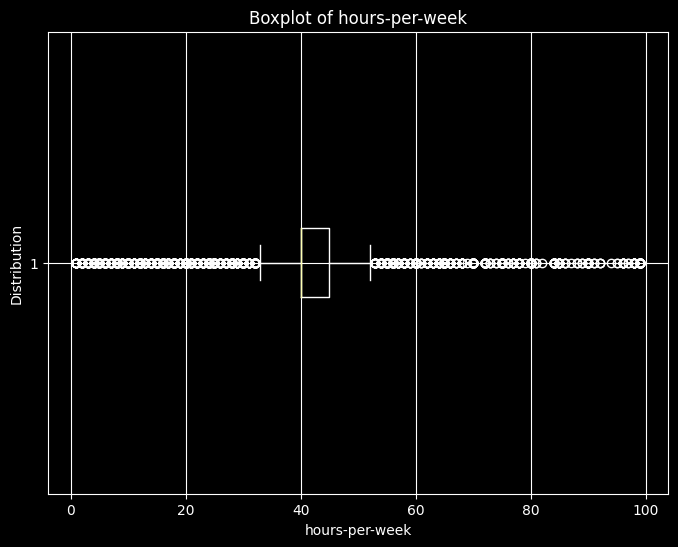

Minimum hours: 1
Maximum hours: 99


In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_filled['hours-per-week'], vert=False)
plt.title('Boxplot of hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

# Calculate min and max
min_hours = df_filled['hours-per-week'].min()
max_hours = df_filled['hours-per-week'].max()

print("Minimum hours:", min_hours)
print("Maximum hours:", max_hours)

In [46]:
# Calculate quartiles
Q1 = df_filled['hours-per-week'].quantile(0.25)
Q3 = df_filled['hours-per-week'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_hours = df_filled[(df_filled['hours-per-week'] < lower_bound) | (df_filled['hours-per-week'] > upper_bound)]

print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)
print("No of outliers: ", outliers_hours.shape)
print("Identified outliers:")
outliers_hours

Lower bound for outliers: 32.5
Upper bound for outliers: 52.5
No of outliers:  (13002, 15)
Identified outliers:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,66,Private,344436,HS-grad,9,Widowed,Sales,Other-relative,White,Female,0,0,8,United-States,<=50K
48822,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K
48825,64,Self-emp-not-inc,136405,HS-grad,9,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,32,United-States,<=50K
48827,55,Private,224655,HS-grad,9,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,32,United-States,<=50K


In [47]:
# Drop identified outliers from the DataFrame
#df_filled = df_filled.drop(outliers_hours.index)

# Print the DataFrame without outliers
#print("DataFrame without outliers:")
#df_filled

In [48]:
#plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
#sns.histplot(data=df_filled, x='capital-gain', kde=True)
#df[column].hist()
#plt.title(f'Histogram of hours per week')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.xticks(rotation=60)
#plt.grid(True)
#plt.show()

In [49]:
#plt.figure(figsize=(8, 6))
#plt.boxplot(df_filled['hours-per-week'], vert=False)
#plt.title('Boxplot of hours-per-week')
#plt.xlabel('hours-per-week')
#plt.ylabel('Distribution')
#plt.grid(True)
#plt.show()

# Calculate min and max
#min_hours = df_filled['hours-per-week'].min()
#max_hours = df_filled['hours-per-week'].max()

#print("Minimum hours:", min_hours)
#print("Maximum hours:", max_hours)

### **Feature Re-engineering**

In [50]:
#sdf

**Grouping "workclass"**

In [51]:
df_filled["workclass"].value_counts()

Private             35420
Self-emp-not-inc     3744
Local-gov            3052
State-gov            1914
Self-emp-inc         1645
Federal-gov          1371
Without-pay            21
Never-worked            9
Name: workclass, dtype: int64

In [52]:
private_num = df.eq("Private").sum()
Self_emp_num = df.eq("Self-emp-not-inc").sum()
Local_gov_num = df.eq("Local-gov").sum()
State_gov_num = df.eq("State-gov").sum()
Self_emp_inc_num = df.eq("Self-emp-inc").sum()
Federal_gov_num = df.eq("Federal-gov").sum()
Without_pay_num = df.eq("Without-pay").sum()
Never_worked_num = df.eq("Never-worked").sum()

print("Private_num: ", private_num, "\n")
print("Self_emp_num: ", Self_emp_num, "\n")
print("Local_gov_num: ", Local_gov_num, "\n")
print("State_gov_num: ", State_gov_num, "\n")
print("Self_emp_inc_num: ", Self_emp_inc_num, "\n")
print("Federal_gov_num: ", Federal_gov_num, "\n")
print("Without_pay_num: ", Without_pay_num, "\n")
print("Never_worked_num: ", Never_worked_num, "\n")

Private_num:  age                   0
workclass         33906
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64 

Self_emp_num:  age                  0
workclass         3862
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income               0
dtype: int64 

Local_gov_num:  age                  0
workclass         3136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex          

In [53]:
df = df_filled.replace('Private', 'Private Sector', inplace = True)
df = df_filled.replace('Self-emp-not-inc', 'Private Sector', inplace = True)
df = df_filled.replace('Local-gov', 'Government Sector', inplace = True)
df = df_filled.replace('State-gov', 'Government Sector', inplace = True)
df = df_filled.replace('Federal-gov', 'Government Sector', inplace = True)
df = df_filled.replace('Self-emp-inc', 'Self-Employed', inplace = True)
df = df_filled.replace('Without-pay', 'Unemployed', inplace = True)
df = df_filled.replace('Never-worked', 'Unemployed', inplace = True)
df_filled['workclass'].value_counts()

Private Sector       39164
Government Sector     6337
Self-Employed         1645
Unemployed              30
Name: workclass, dtype: int64

**Grouping "age"**

In [54]:
print(df_filled["age"].value_counts())
print("Total age categories: ", len(df_filled["age"].value_counts()))

36    1309
35    1304
33    1285
31    1279
23    1261
      ... 
74      77
75      72
76      68
77      54
78      33
Name: age, Length: 62, dtype: int64
Total age categories:  62


In [55]:
df_filled["age"].describe()

count    47176.000000
mean        38.531753
std         13.416701
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         78.000000
Name: age, dtype: float64

In [56]:
def categorizing_age(age):
  if 17 <= age < 20:
    return "Teenager (14-19)"
  elif 20 <= age < 35:
    return "Young Adult (20-34)"
  elif 35 <= age < 60:
    return "Adult (35-59)"
  elif 60 <= age < 91:
    return "Senior/Elder (60-90)"
  else:
    return "Other"

df_filled["age"] = df_filled["age"].apply(categorizing_age)
df_filled["age"].value_counts()

Adult (35-59)           23188
Young Adult (20-34)     17813
Senior/Elder (60-90)     3759
Teenager (14-19)         2416
Name: age, dtype: int64

**Grouping "relationship"**

In [57]:
df_filled["relationship"].value_counts()

Husband           19066
Not-in-family     12121
Own-child          7331
Unmarried          4947
Wife               2272
Other-relative     1439
Name: relationship, dtype: int64

In [58]:
df_filled['relationship'] = df_filled['relationship'].replace({'Husband': 'Spouse', 'Wife': 'Spouse', 'Not-in-family': 'Non-Family', 'Other-relative': 'Non-Family'})
df_filled['relationship'].value_counts()

Spouse        21338
Non-Family    13560
Own-child      7331
Unmarried      4947
Name: relationship, dtype: int64

**Grouping "Marital status"**

In [59]:
df_filled["marital-status"].value_counts()

Married-civ-spouse       21651
Never-married            15534
Divorced                  6458
Separated                 1474
Widowed                   1423
Married-spouse-absent      602
Married-AF-spouse           34
Name: marital-status, dtype: int64

In [60]:
marital_status_grouping = {
    'Married': ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
    'Never Married': ['Never-married'],
    'Divorced': ['Divorced', 'Separated'],
    'Widowed': ['Widowed']
}

df_filled['marital-status'] = df_filled['marital-status'].replace({'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married', 'Separated': 'Divorced'})
df_filled['marital-status'].value_counts()


Married          22287
Never-married    15534
Divorced          7932
Widowed           1423
Name: marital-status, dtype: int64

**Grouping "native country"**

In [61]:
df_filled["native-country"].value_counts()

United-States                 43255
Mexico                          822
Philippines                     292
Germany                         202
Puerto-Rico                     179
Canada                          176
India                           150
Cuba                            136
El-Salvador                     136
England                         123
China                           122
South                           112
Jamaica                         106
Italy                           103
Dominican-Republic              102
Japan                            88
Vietnam                          86
Poland                           84
Columbia                         83
Haiti                            74
Guatemala                        73
Portugal                         65
Taiwan                           64
Iran                             58
Greece                           48
Ecuador                          44
Nicaragua                        41
Peru                        

In [62]:
country_categories = {
    'North America': ['Mexico', 'Canada', 'Puerto-Rico'],
    'Central America': ['El-Salvador', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Guatemala', 'Haiti', 'Honduras', 'Trinadad&Tobago'],
    'South America': ['Columbia', 'Peru', 'Ecuador'],
    'Europe': ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Ireland', 'Scotland', 'Holand-Netherlands'],
    'Asia': ['Philippines', 'India', 'China', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Cambodia', 'Laos', 'Yugoslavia'],
    'Other': ['South', 'Hong', 'Nicaragua', 'Greece', 'Hungary', 'Outlying-US(Guam-USVI-etc)']
}

def categorizing_country(country):
  for group, types in country_categories.items():
    if country in types:
      return group

df_filled["native-country"] = df_filled["native-country"].apply(categorizing_country)
df_filled["native-country"].value_counts()

North America      1177
Asia                963
Europe              673
Central America     672
Other               271
South America       165
Name: native-country, dtype: int64

**Grouping "Occupation"**

In [63]:
df_filled["occupation"].value_counts()

Prof-specialty       8673
Craft-repair         5914
Exec-managerial      5888
Adm-clerical         5437
Sales                5314
Other-service        4740
Machine-op-inspct    2943
Transport-moving     2272
Handlers-cleaners    1974
Farming-fishing      1421
Tech-support         1404
Protective-serv       950
Priv-house-serv       231
Armed-Forces           15
Name: occupation, dtype: int64

In [64]:
def categorizing_occupation(df_filled):
  for index, row in df_filled.iterrows():
    occupation = row['occupation']
    if occupation in ["Prof-specialty", "Exec-managerial", "Tech-support"]:
      df_filled.at[index, f'occupation'] = 'Professional-Services'
    elif occupation in ["Craft-repair", "Machine-op-inspct"]:
      df_filled.at[index, f'occupation'] = 'Skilled-Trades'
    elif occupation in ["Handlers-cleaners", "Farming-fishing"]:
            df_filled.at[index, f'occupation'] = 'Manual-Labor'

categorizing_occupation(df_filled)

# Check value counts after categorization
print(df_filled["occupation"].value_counts())

Professional-Services    15965
Skilled-Trades            8857
Adm-clerical              5437
Sales                     5314
Other-service             4740
Manual-Labor              3395
Transport-moving          2272
Protective-serv            950
Priv-house-serv            231
Armed-Forces                15
Name: occupation, dtype: int64


**Grouping "hours-per-week"**

In [65]:
df_filled["hours-per-week"].describe()

count    47176.000000
mean        40.501950
std         12.362989
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [66]:
# Define the ranges for categorizing work hours
ranges = [
    (0, 10),    # Low Work Hours
    (11, 40),   # Normal Work Hours
    (41, 99)    # High Work Hours
]

def categorize_work_hours(hours):
    for range_min, range_max in ranges:
        if range_min <= hours <= range_max:
            return f'{range_min}-{range_max}'

df_filled['hours-per-week'] = df_filled['hours-per-week'].apply(categorize_work_hours)
df_filled

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,Adult (35-59),Government Sector,77516,Bachelors,13,Never-married,Adm-clerical,Non-Family,White,Male,2174,0,11-40,None,<=50K
1,Adult (35-59),Private Sector,83311,Bachelors,13,Married,Professional-Services,Spouse,White,Male,0,0,11-40,None,<=50K
2,Adult (35-59),Private Sector,215646,HS-grad,9,Divorced,Manual-Labor,Non-Family,White,Male,0,0,11-40,None,<=50K
3,Adult (35-59),Private Sector,234721,11th,7,Married,Manual-Labor,Spouse,Black,Male,0,0,11-40,None,<=50K
4,Young Adult (20-34),Private Sector,338409,Bachelors,13,Married,Professional-Services,Spouse,Black,Female,0,0,11-40,Central America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Adult (35-59),Private Sector,215419,Bachelors,13,Divorced,Professional-Services,Non-Family,White,Female,0,0,11-40,None,<=50K
48838,Senior/Elder (60-90),Private Sector,321403,HS-grad,9,Widowed,Professional-Services,Non-Family,Black,Male,0,0,11-40,None,<=50K
48839,Adult (35-59),Private Sector,374983,Bachelors,13,Married,Professional-Services,Spouse,White,Male,0,0,41-99,None,<=50K
48840,Adult (35-59),Private Sector,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,11-40,None,<=50K


In [67]:
print(df_filled["capital-gain"].value_counts())

0        43288
15024      498
7688       399
7298       355
99999      235
         ...  
18481        1
1639         1
6097         1
22040        1
6612         1
Name: capital-gain, Length: 123, dtype: int64


In [68]:
df_filled["capital-gain"].describe()

count    47176.000000
mean      1075.308292
std       7440.118401
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

### **Checking for duplicate values**

In [69]:
duplicate_rows = df_filled[df_filled.duplicated()]
print("Number of duplicated rows: ", duplicate_rows.shape)
duplicate_rows.head()

Number of duplicated rows:  (392, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
3012,Adult (35-59),Private Sector,194636,Bachelors,13,Married,Professional-Services,Spouse,White,Male,0,0,41-99,None,>50K
3261,Young Adult (20-34),Private Sector,108658,HS-grad,9,Never-married,Skilled-Trades,Non-Family,White,Male,0,0,11-40,None,<=50K
3692,Adult (35-59),Private Sector,271828,HS-grad,9,Married,Skilled-Trades,Spouse,White,Male,0,0,11-40,None,>50K
4152,Young Adult (20-34),Private Sector,174714,Some-college,10,Never-married,Professional-Services,Own-child,White,Male,0,0,11-40,None,<=50K
4277,Young Adult (20-34),Private Sector,180052,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,11-40,None,<=50K


In [70]:
df_filled.drop_duplicates(inplace=True)
print("Remaining dataframe size: ", df_filled.shape)
df_filled.head(3)

Remaining dataframe size:  (46784, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,Adult (35-59),Government Sector,77516,Bachelors,13,Never-married,Adm-clerical,Non-Family,White,Male,2174,0,11-40,None,<=50K
1,Adult (35-59),Private Sector,83311,Bachelors,13,Married,Professional-Services,Spouse,White,Male,0,0,11-40,None,<=50K
2,Adult (35-59),Private Sector,215646,HS-grad,9,Divorced,Manual-Labor,Non-Family,White,Male,0,0,11-40,None,<=50K


In [71]:
#xsxsxs

**Visualizing each column using a histogram**

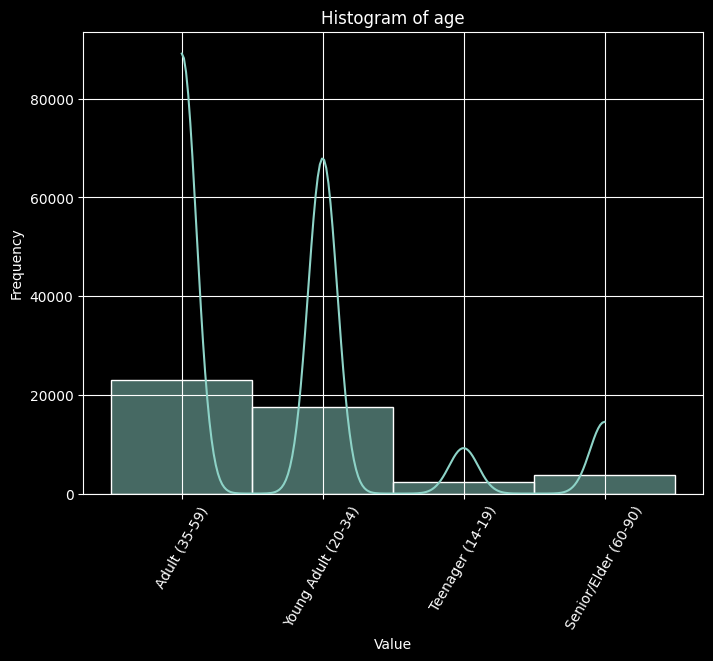

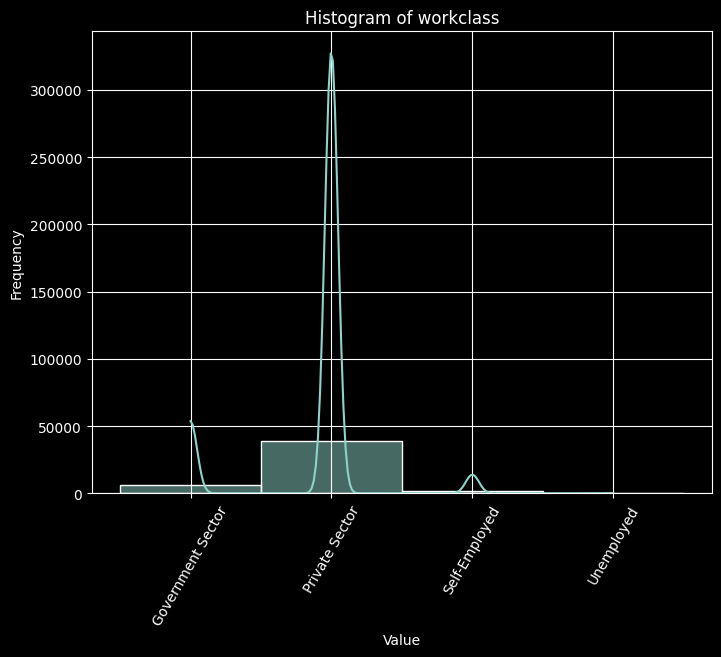

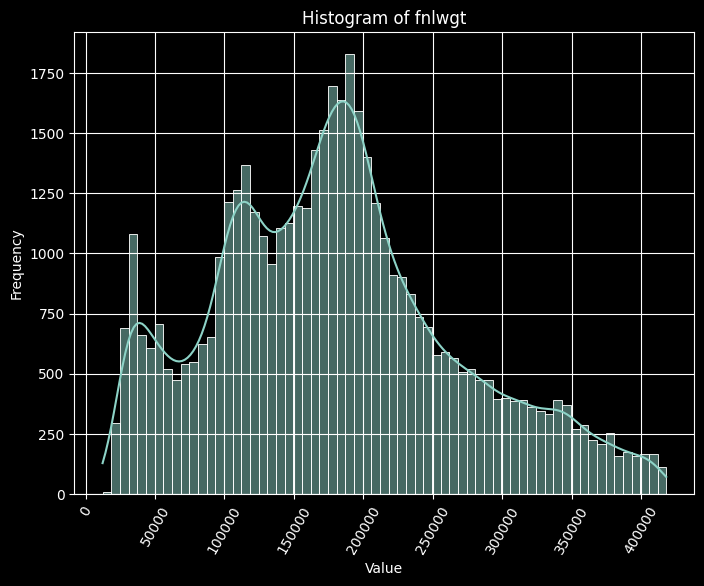

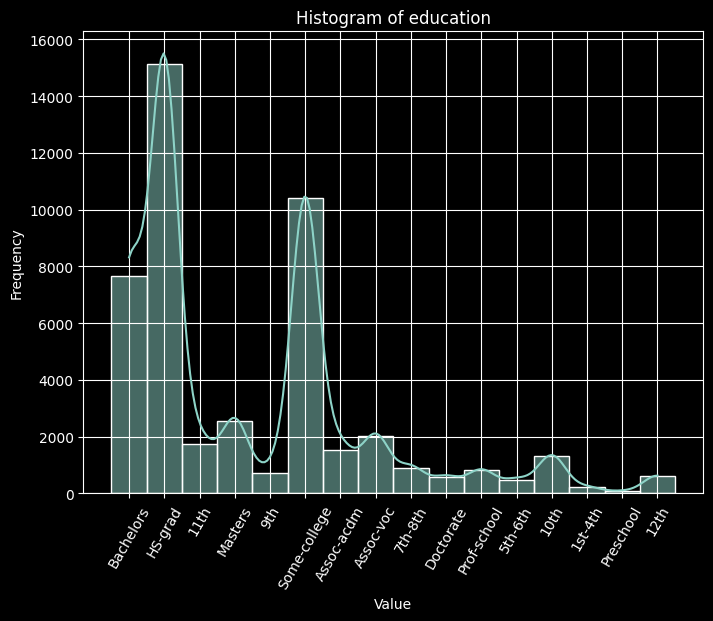

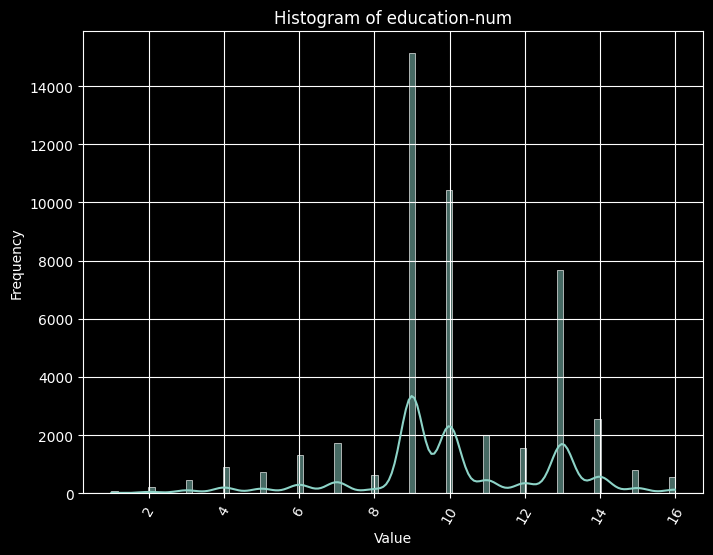

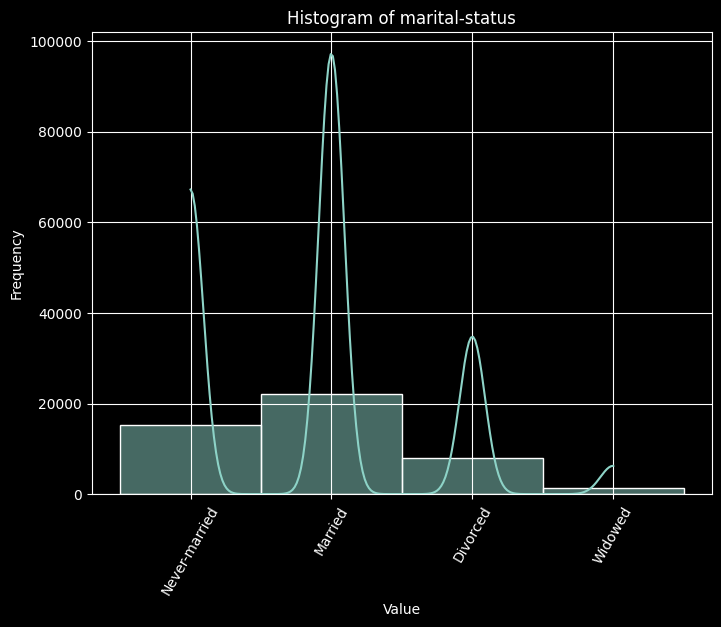

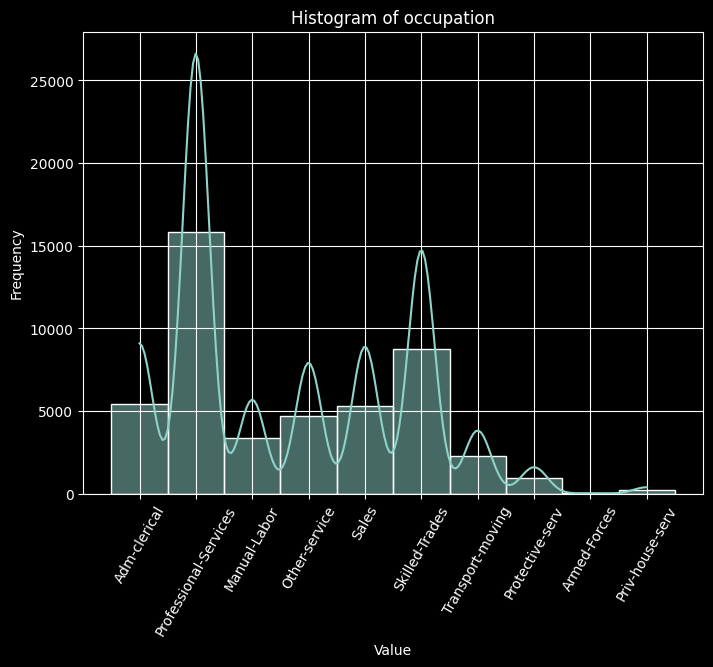

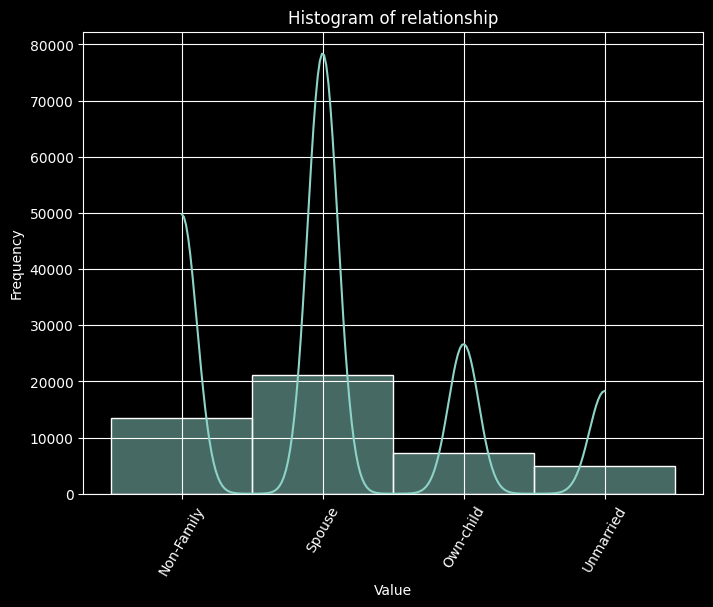

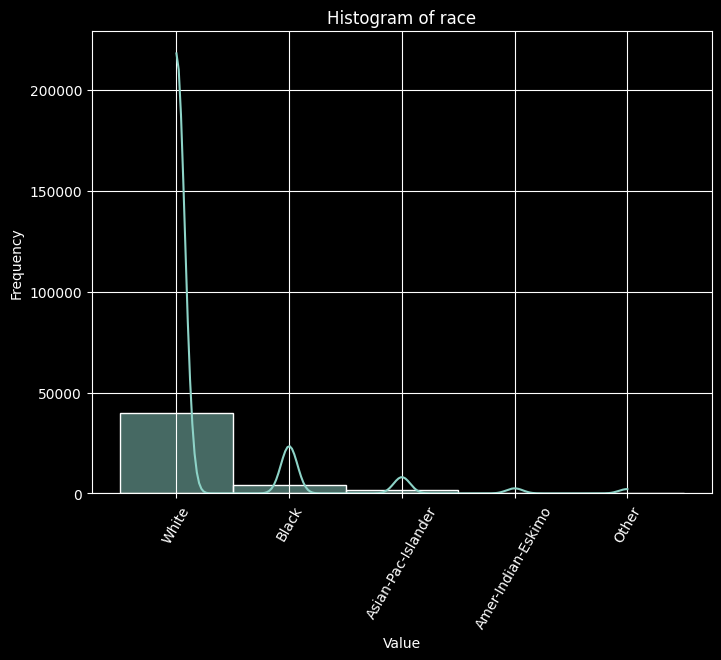

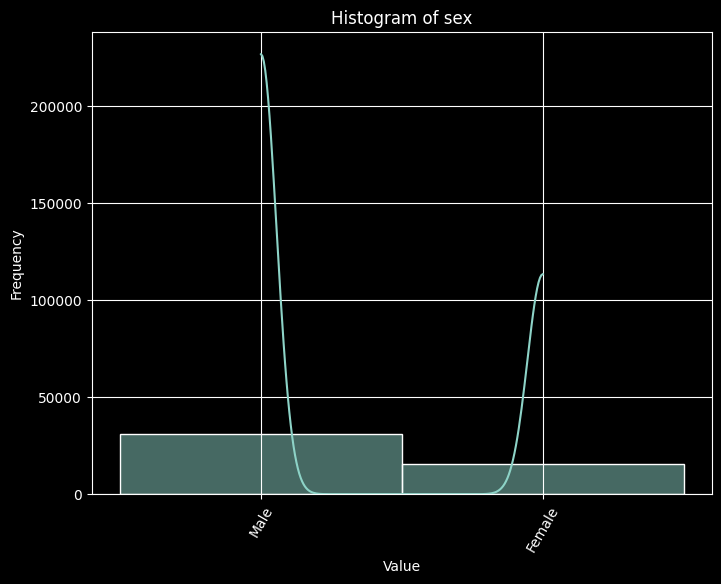

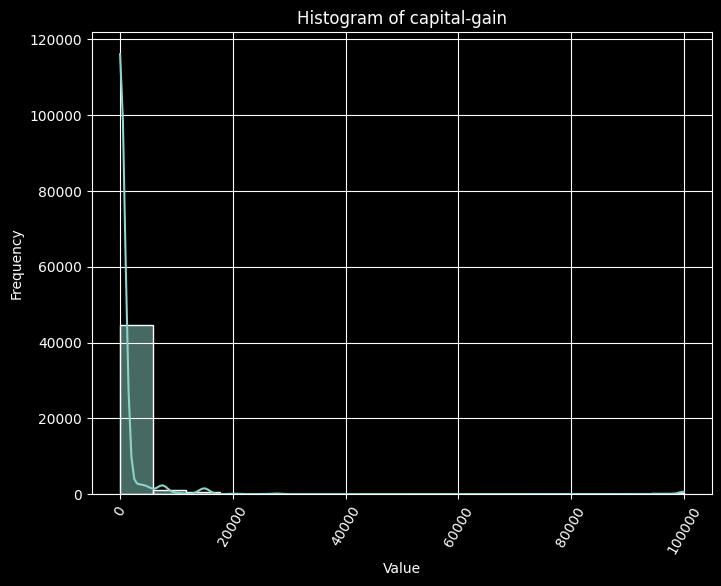

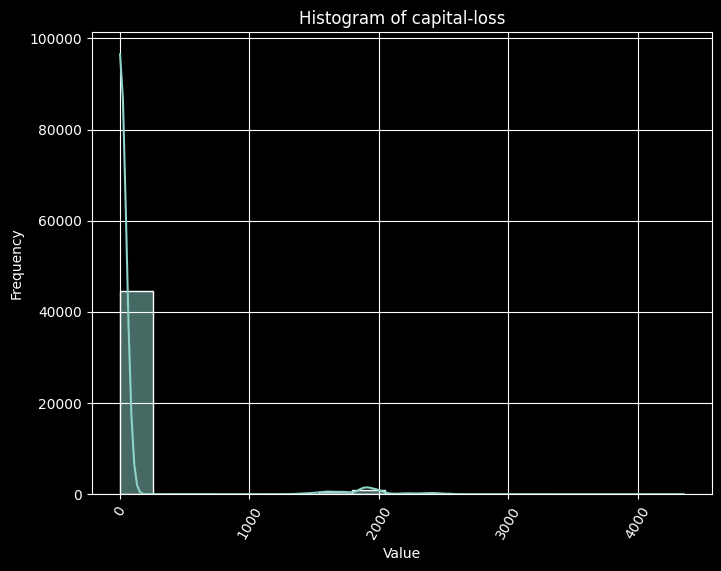

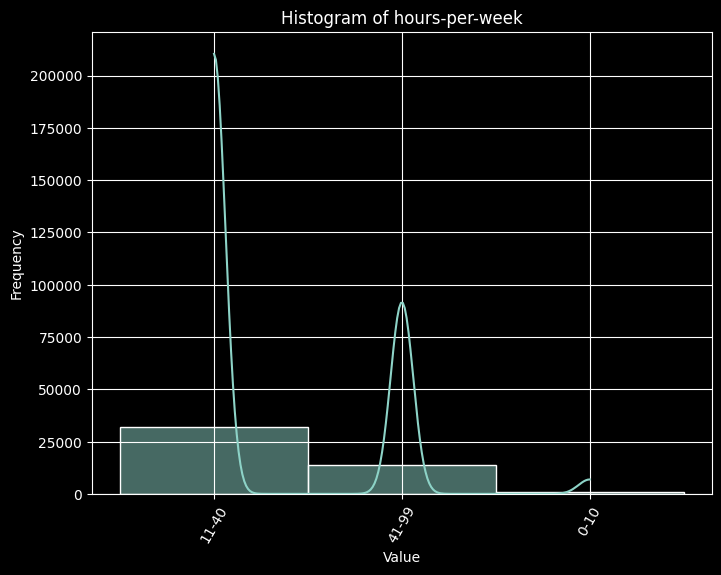

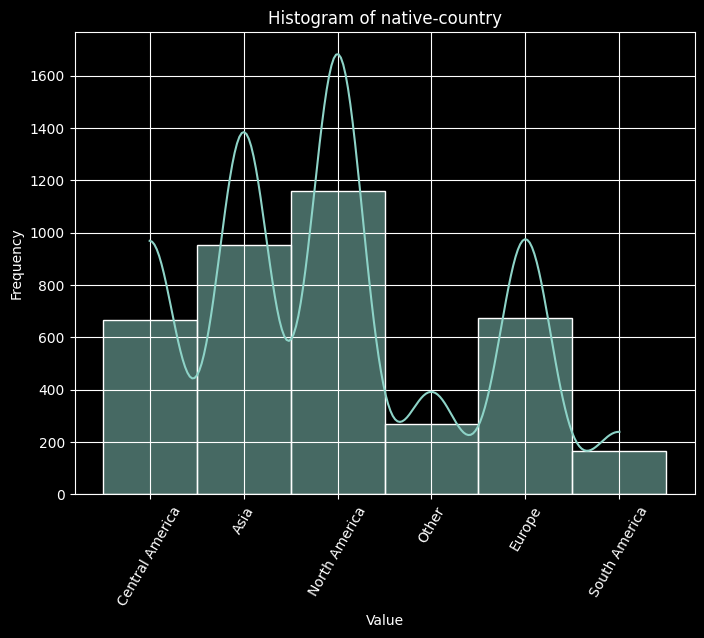

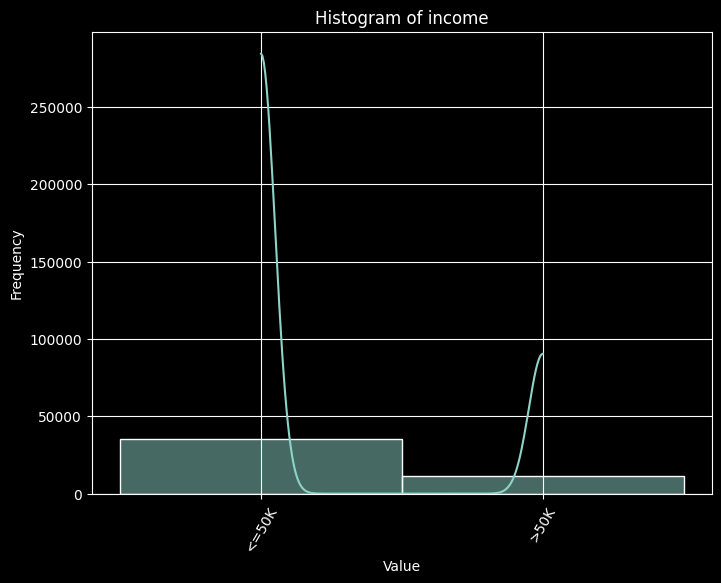

In [72]:
for column in df_filled.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.histplot(data=df_filled, x=f'{column}', kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.grid(True)
    plt.show()

Smoothing capital gain and capital loss to reduce the noise in data

In [73]:
window_size = 3

# Apply moving average smoothing
df_filled['smoothed_capital_gain'] = df_filled['capital-gain'].rolling(window=window_size, min_periods=1).mean()
df_filled['smoothed_capital_loss'] = df_filled['capital-loss'].rolling(window=window_size, min_periods=1).mean()

df_filled.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,smoothed_capital_gain,smoothed_capital_loss
0,Adult (35-59),Government Sector,77516,Bachelors,13,Never-married,Adm-clerical,Non-Family,White,Male,2174,0,11-40,None,<=50K,2174.000000,0.0
1,Adult (35-59),Private Sector,83311,Bachelors,13,Married,Professional-Services,Spouse,White,Male,0,0,11-40,None,<=50K,1087.000000,0.0
2,Adult (35-59),Private Sector,215646,HS-grad,9,Divorced,Manual-Labor,Non-Family,White,Male,0,0,11-40,None,<=50K,724.666667,0.0
3,Adult (35-59),Private Sector,234721,11th,7,Married,Manual-Labor,Spouse,Black,Male,0,0,11-40,None,<=50K,0.000000,0.0
4,Young Adult (20-34),Private Sector,338409,Bachelors,13,Married,Professional-Services,Spouse,Black,Female,0,0,11-40,Central America,<=50K,0.000000,0.0
5,Adult (35-59),Private Sector,284582,Masters,14,Married,Professional-Services,Spouse,White,Female,0,0,11-40,None,<=50K,0.000000,0.0
6,Adult (35-59),Private Sector,160187,9th,5,Married,Other-service,Non-Family,Black,Female,0,0,11-40,Central America,<=50K,0.000000,0.0
7,Adult (35-59),Private Sector,209642,HS-grad,9,Married,Professional-Services,Spouse,White,Male,0,0,41-99,None,>50K,0.000000,0.0
8,Young Adult (20-34),Private Sector,45781,Masters,14,Never-married,Professional-Services,Non-Family,White,Female,14084,0,41-99,None,>50K,4694.666667,0.0
9,Adult (35-59),Private Sector,159449,Bachelors,13,Married,Professional-Services,Spouse,White,Male,5178,0,11-40,None,>50K,6420.666667,0.0


In [74]:
df_filled.drop(columns='capital-gain', inplace=True)
df_filled.drop(columns='capital-loss', inplace=True)
df_filled.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,smoothed_capital_gain,smoothed_capital_loss
0,Adult (35-59),Government Sector,77516,Bachelors,13,Never-married,Adm-clerical,Non-Family,White,Male,11-40,None,<=50K,2174.000000,0.0
1,Adult (35-59),Private Sector,83311,Bachelors,13,Married,Professional-Services,Spouse,White,Male,11-40,None,<=50K,1087.000000,0.0
2,Adult (35-59),Private Sector,215646,HS-grad,9,Divorced,Manual-Labor,Non-Family,White,Male,11-40,None,<=50K,724.666667,0.0
3,Adult (35-59),Private Sector,234721,11th,7,Married,Manual-Labor,Spouse,Black,Male,11-40,None,<=50K,0.000000,0.0
4,Young Adult (20-34),Private Sector,338409,Bachelors,13,Married,Professional-Services,Spouse,Black,Female,11-40,Central America,<=50K,0.000000,0.0
5,Adult (35-59),Private Sector,284582,Masters,14,Married,Professional-Services,Spouse,White,Female,11-40,None,<=50K,0.000000,0.0
6,Adult (35-59),Private Sector,160187,9th,5,Married,Other-service,Non-Family,Black,Female,11-40,Central America,<=50K,0.000000,0.0
7,Adult (35-59),Private Sector,209642,HS-grad,9,Married,Professional-Services,Spouse,White,Male,41-99,None,>50K,0.000000,0.0
8,Young Adult (20-34),Private Sector,45781,Masters,14,Never-married,Professional-Services,Non-Family,White,Female,41-99,None,>50K,4694.666667,0.0
9,Adult (35-59),Private Sector,159449,Bachelors,13,Married,Professional-Services,Spouse,White,Male,11-40,None,>50K,6420.666667,0.0


Normalization

In [75]:
from sklearn.preprocessing import StandardScaler

# Select specific columns for normalization
columns_to_normalize = ['fnlwgt', 'education-num', 'smoothed_capital_gain',	'smoothed_capital_loss']

# Normalize selected columns
scaler = StandardScaler()
df_filled[columns_to_normalize] = scaler.fit_transform(df_filled[columns_to_normalize])

df_filled.head(10)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,smoothed_capital_gain,smoothed_capital_loss
0,Adult (35-59),Government Sector,-1.166390,Bachelors,1.136291,Never-married,Adm-clerical,Non-Family,White,Male,11-40,None,<=50K,0.252577,-0.379542
1,Adult (35-59),Private Sector,-1.100343,Bachelors,1.136291,Married,Professional-Services,Spouse,White,Male,11-40,None,<=50K,0.000696,-0.379542
2,Adult (35-59),Private Sector,0.407901,HS-grad,-0.427038,Divorced,Manual-Labor,Non-Family,White,Male,11-40,None,<=50K,-0.083265,-0.379542
3,Adult (35-59),Private Sector,0.625302,11th,-1.208703,Married,Manual-Labor,Spouse,Black,Male,11-40,None,<=50K,-0.251185,-0.379542
4,Young Adult (20-34),Private Sector,1.807052,Bachelors,1.136291,Married,Professional-Services,Spouse,Black,Female,11-40,Central America,<=50K,-0.251185,-0.379542
5,Adult (35-59),Private Sector,1.193576,Masters,1.527123,Married,Professional-Services,Spouse,White,Female,11-40,None,<=50K,-0.251185,-0.379542
6,Adult (35-59),Private Sector,-0.224174,9th,-1.990367,Married,Other-service,Non-Family,Black,Female,11-40,Central America,<=50K,-0.251185,-0.379542
7,Adult (35-59),Private Sector,0.339473,HS-grad,-0.427038,Married,Professional-Services,Spouse,White,Male,41-99,None,>50K,-0.251185,-0.379542
8,Young Adult (20-34),Private Sector,-1.528079,Masters,1.527123,Never-married,Professional-Services,Non-Family,White,Female,41-99,None,>50K,0.836670,-0.379542
9,Adult (35-59),Private Sector,-0.232586,Bachelors,1.136291,Married,Professional-Services,Spouse,White,Male,11-40,None,>50K,1.236621,-0.379542


## **Analysing Correlation**

<ipython-input-76-37f47d3b9f82>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


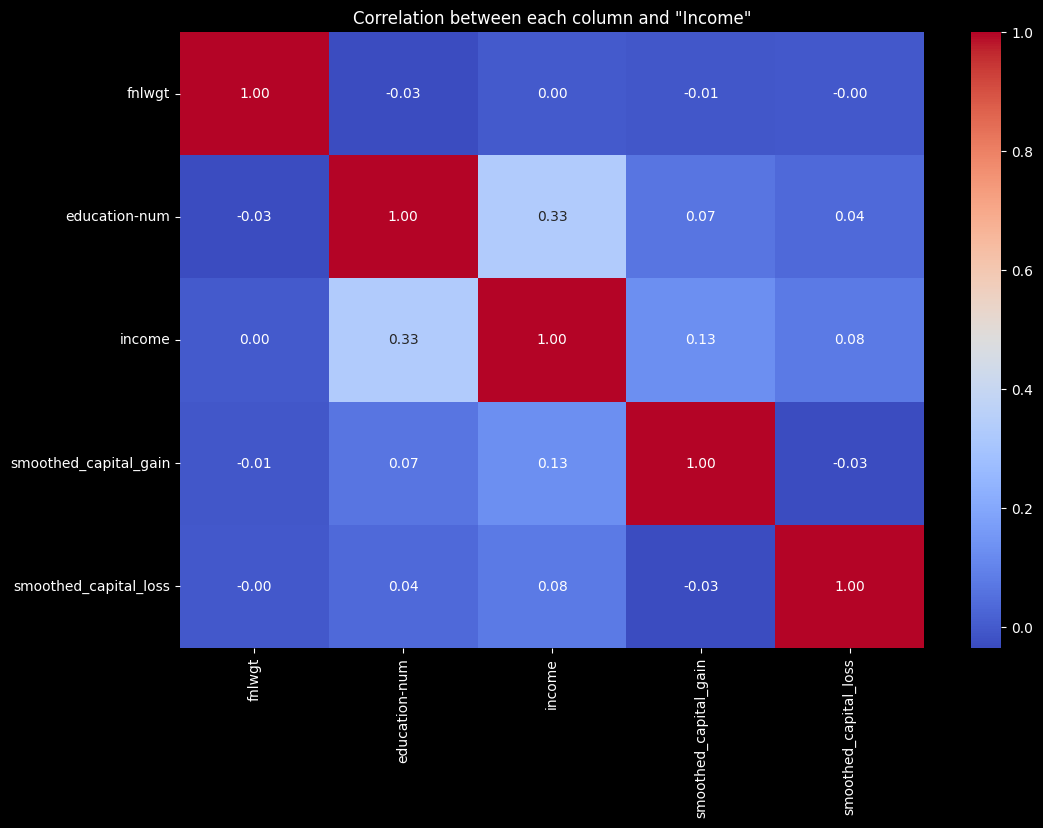

In [76]:
le = LabelEncoder()
correlation_df = df_filled.copy()
correlation_df['income'] = le.fit_transform(correlation_df['income'])

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Extract correlations with the "income" column
income_correlation = correlation_matrix['income']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

In [77]:
correlation_df['age'] = le.fit_transform(correlation_df['age'])
correlation_df['workclass'] = le.fit_transform(correlation_df['workclass'])
correlation_df['fnlwgt'] = le.fit_transform(correlation_df['fnlwgt'])
correlation_df['education'] = le.fit_transform(correlation_df['education'])
correlation_df['education-num'] = le.fit_transform(correlation_df['education-num'])
correlation_df['marital-status'] = le.fit_transform(correlation_df['marital-status'])
correlation_df['occupation'] = le.fit_transform(correlation_df['occupation'])
correlation_df['relationship'] = le.fit_transform(correlation_df['relationship'])
correlation_df['race'] = le.fit_transform(correlation_df['race'])
correlation_df['sex'] = le.fit_transform(correlation_df['sex'])
correlation_df['smoothed_capital_gain'] = le.fit_transform(correlation_df['smoothed_capital_gain'])
correlation_df['smoothed_capital_loss'] = le.fit_transform(correlation_df['smoothed_capital_loss'])
correlation_df['hours-per-week'] = le.fit_transform(correlation_df['hours-per-week'])
correlation_df['native-country'] = le.fit_transform(correlation_df['native-country'])
correlation_df['income'] = le.fit_transform(correlation_df['income'])

correlation_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,smoothed_capital_gain,smoothed_capital_loss
0,0,0,3432,9,12,2,0,0,4,1,1,6,0,147,0
1,0,1,3759,9,12,1,5,2,4,1,1,6,0,57,0
2,0,1,18220,11,8,0,2,0,4,1,1,6,0,27,0
3,0,1,19866,1,6,1,2,2,2,1,1,6,0,0,0
4,3,1,25255,9,12,1,5,2,2,0,1,1,0,0,0
5,0,1,23003,12,13,1,5,2,4,0,1,6,0,0,0
6,0,1,11098,6,4,1,3,0,2,0,1,1,0,0,0
7,0,1,17615,11,8,1,5,2,4,1,2,6,1,0,0
8,3,1,1663,12,13,2,5,0,4,0,2,6,1,342,0
9,0,1,11004,9,12,1,5,2,4,1,1,6,1,405,0


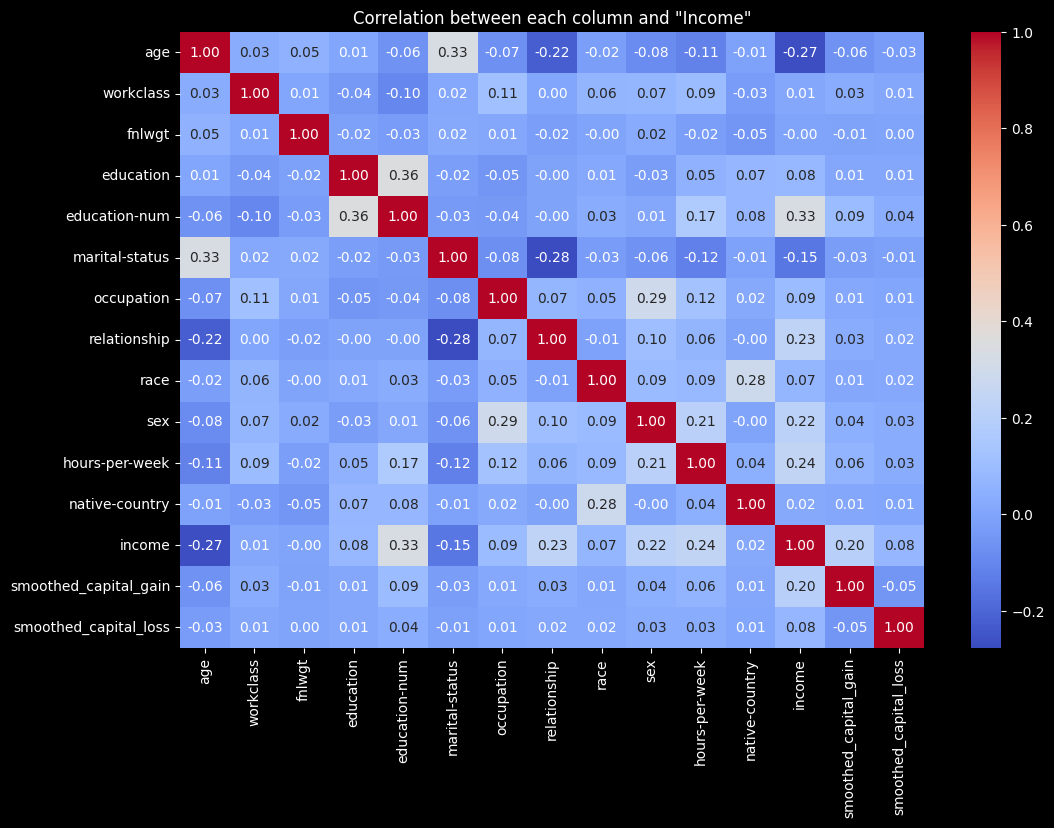

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

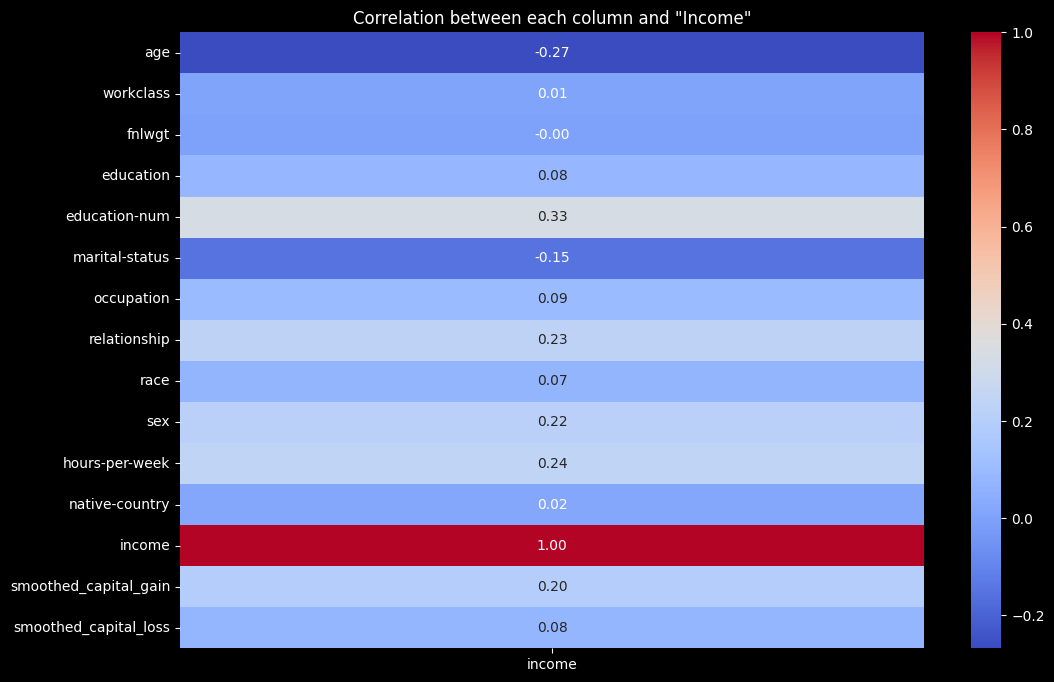

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract correlations with the "income" column
income_correlation = correlation_matrix['income']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(income_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

### **Balance the imbalanced dataset**

Using the SMOTE Technique

In [80]:
from imblearn.over_sampling import SMOTE

y = correlation_df["income"]
X = correlation_df.drop("income", axis=1)

smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["income"])], axis=1)

print("Size of the resampled dataset: ", resampled_df.shape)
resampled_df.head()

Size of the resampled dataset:  (71000, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,smoothed_capital_gain,smoothed_capital_loss,income
0,0,0,3432,9,12,2,0,0,4,1,1,6,147,0,0
1,0,1,3759,9,12,1,5,2,4,1,1,6,57,0,0
2,0,1,18220,11,8,0,2,0,4,1,1,6,27,0,0
3,0,1,19866,1,6,1,2,2,2,1,1,6,0,0,0
4,3,1,25255,9,12,1,5,2,2,0,1,1,0,0,0


In [81]:
resampled_df["income"].value_counts()

0    35500
1    35500
Name: income, dtype: int64

### **Rechecking for outliers and correlation**

To check if balancing the dataset had an effect on the handled outliers and correlation.

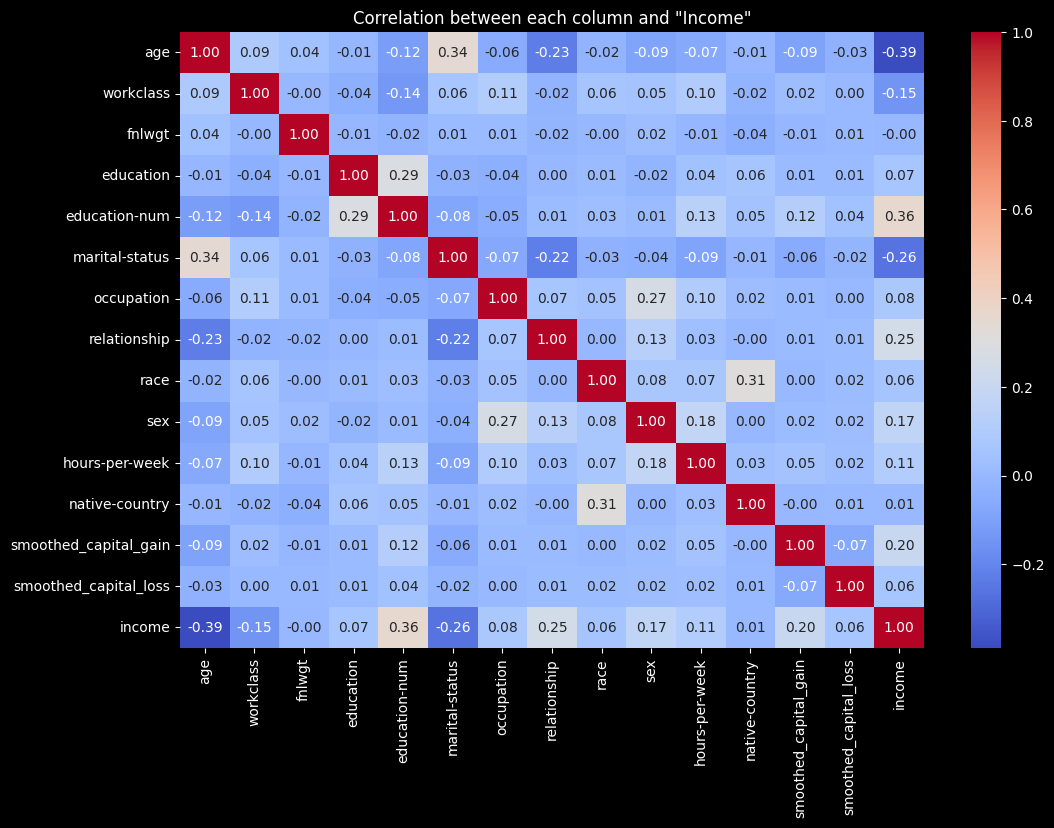

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = resampled_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation between each column and "Income"')
plt.show()

Resampling had not affected the correlation

Since now "Final Weight" has no correlation with the "income:, that column can be dropped.

In [83]:
resampled_df.drop(columns='fnlwgt', inplace=True)
resampled_df.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,smoothed_capital_gain,smoothed_capital_loss,income
0,0,0,9,12,2,0,0,4,1,1,6,147,0,0
1,0,1,9,12,1,5,2,4,1,1,6,57,0,0
2,0,1,11,8,0,2,0,4,1,1,6,27,0,0
3,0,1,1,6,1,2,2,2,1,1,6,0,0,0
4,3,1,9,12,1,5,2,2,0,1,1,0,0,0
5,0,1,12,13,1,5,2,4,0,1,6,0,0,0
6,0,1,6,4,1,3,0,2,0,1,1,0,0,0
7,0,1,11,8,1,5,2,4,1,2,6,0,0,1
8,3,1,12,13,2,5,0,4,0,2,6,342,0,1
9,0,1,9,12,1,5,2,4,1,1,6,405,0,1


# **Naive Bayes**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [85]:
y = resampled_df['income']
X = resampled_df.drop(['income'], axis=1)

In [86]:
y

0        0
1        0
2        0
3        0
4        0
        ..
70995    1
70996    1
70997    1
70998    1
70999    1
Name: income, Length: 71000, dtype: int64

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [88]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [89]:
train_predictions = gb.predict(x_train)
training_accuracy = accuracy_score(y_train, train_predictions)

y_pred = gb.predict(x_test)

print("\n classification_report of the training")
print(classification_report(y_train, train_predictions))

print("\n classification_report of the testing")
print(classification_report(y_test,y_pred))

print("\n confusion_matrix")
Naive_Bayes_Confusion_Matrix = confusion_matrix(y_test,y_pred)
print(Naive_Bayes_Confusion_Matrix)


print("\n Training Accuracy:", training_accuracy*100)
print("\n Testing Accuracy:", accuracy_score(y_test,y_pred)*100)


 classification_report of the training
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     28423
           1       0.79      0.81      0.80     28377

    accuracy                           0.80     56800
   macro avg       0.80      0.80      0.80     56800
weighted avg       0.80      0.80      0.80     56800


 classification_report of the testing
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      7077
           1       0.79      0.80      0.79      7123

    accuracy                           0.79     14200
   macro avg       0.79      0.79      0.79     14200
weighted avg       0.79      0.79      0.79     14200


 confusion_matrix
[[5536 1541]
 [1447 5676]]

 Training Accuracy: 79.74647887323944

 Testing Accuracy: 78.95774647887323


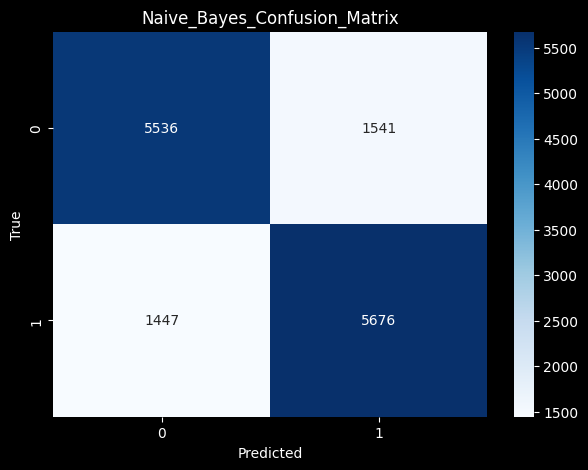

In [90]:
plt.figure(figsize=(7, 5))
sns.heatmap(Naive_Bayes_Confusion_Matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive_Bayes_Confusion_Matrix')
plt.show()

In [91]:
#from sklearn.model_selection import learning_curve

#def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
#    plt.figure()
#    plt.title(title)
#    plt.xlabel("Training examples")
#    plt.ylabel("Accuracy")
#    train_sizes, train_scores, test_scores = learning_curve(
#        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
#    train_scores_mean = np.mean(train_scores, axis=1)
#    train_scores_std = np.std(train_scores, axis=1)
#    test_scores_mean = np.mean(test_scores, axis=1)
#    test_scores_std = np.std(test_scores, axis=1)
#    plt.grid()

#    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                     train_scores_mean + train_scores_std, alpha=0.1,
#                     color="r")
#    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
#    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#             label="Training score")
#    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#             label="Cross-validation score")

#    plt.legend(loc="best")
#    return plt

In [92]:
#plot_learning_curve(gb, "Learning Curve", x_train, y_train, cv=10)
#plt.show()

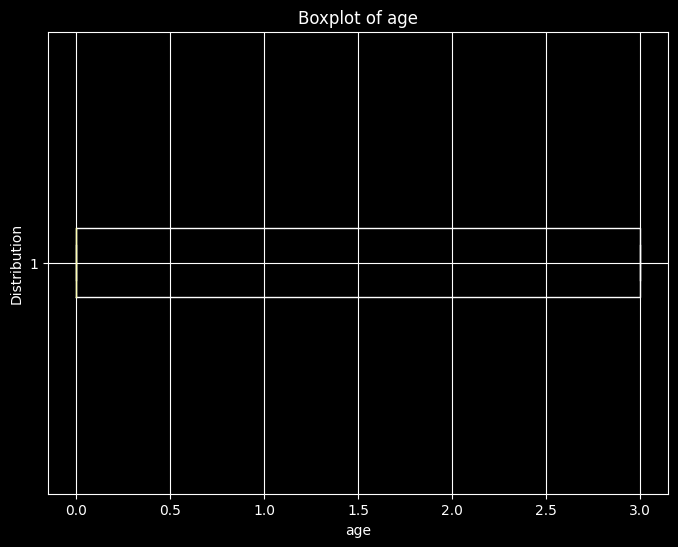

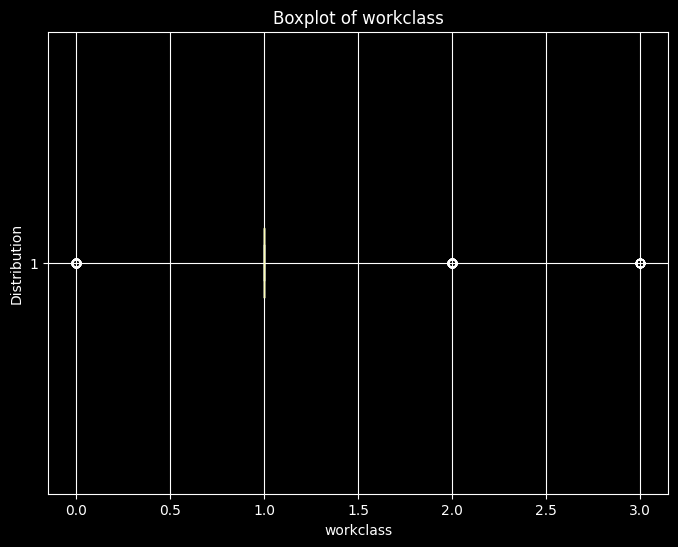

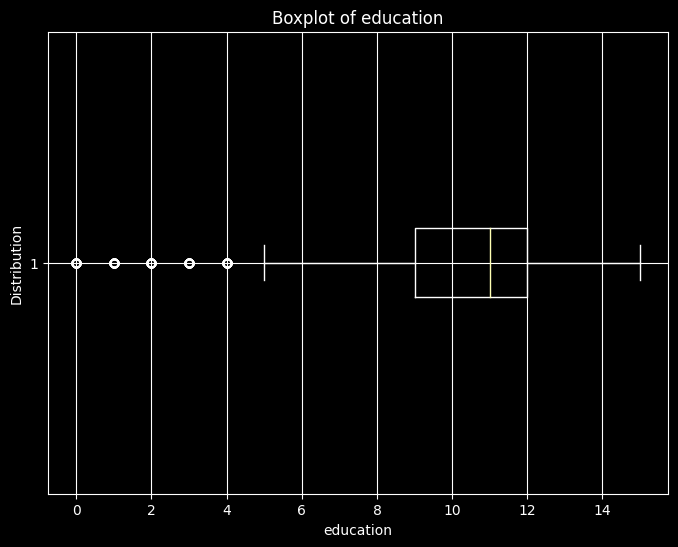

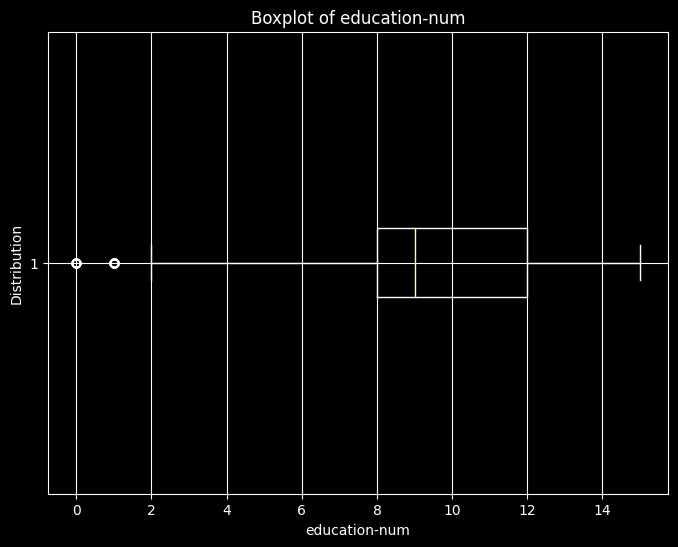

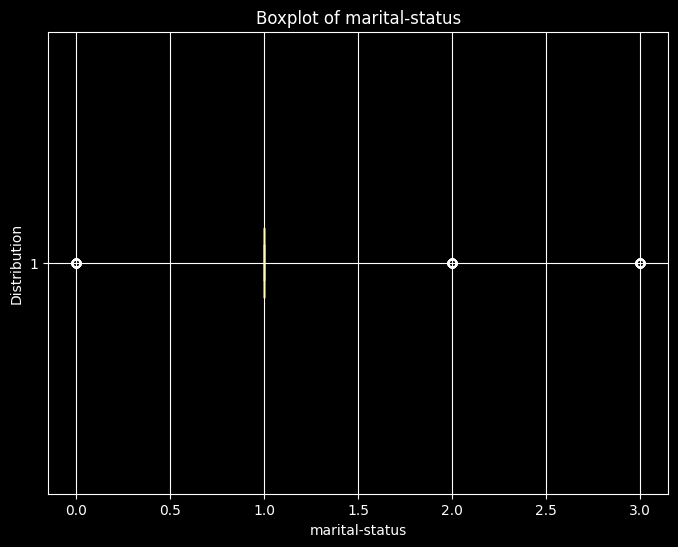

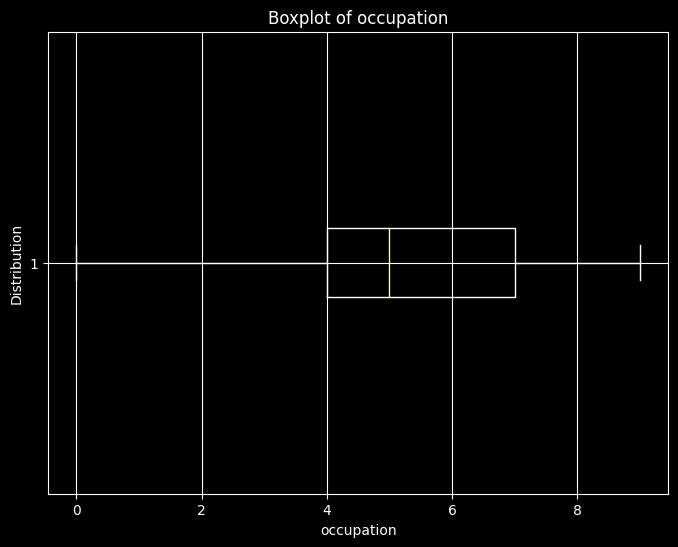

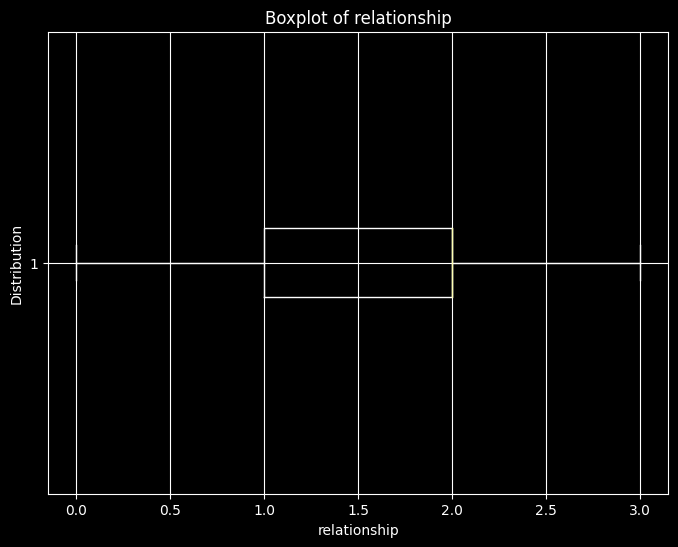

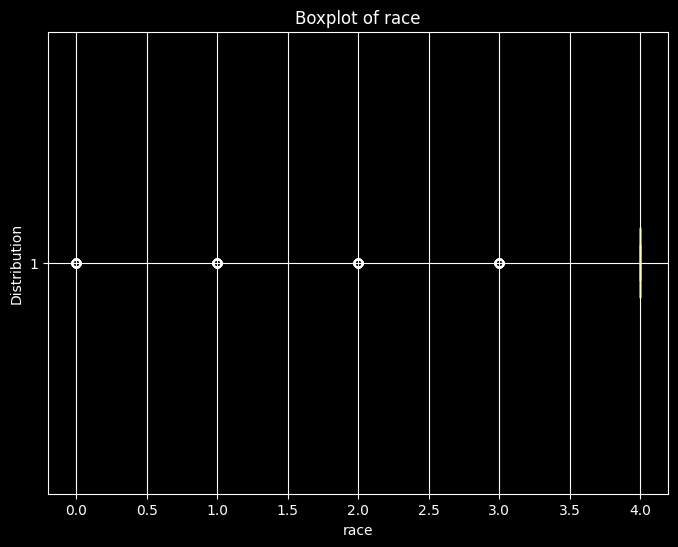

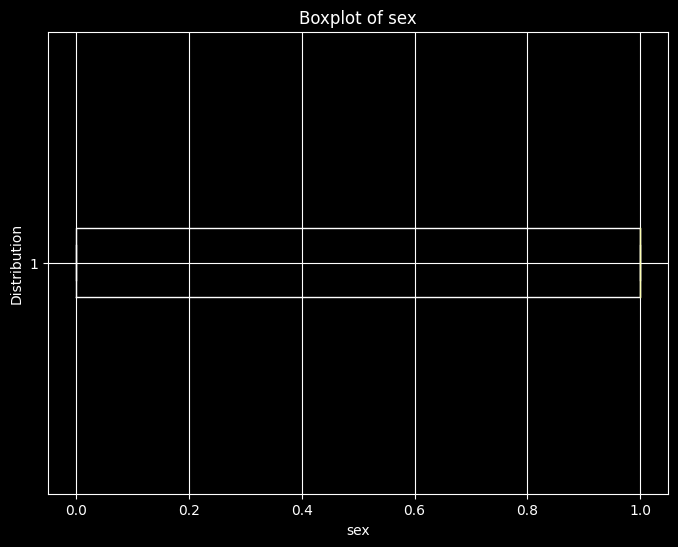

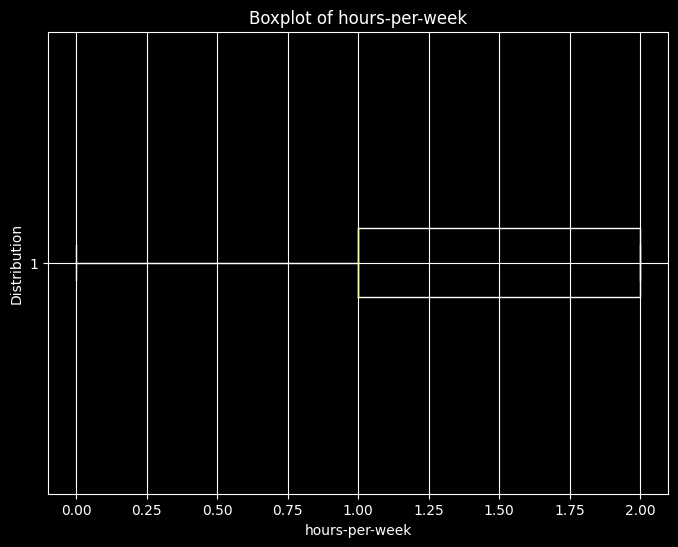

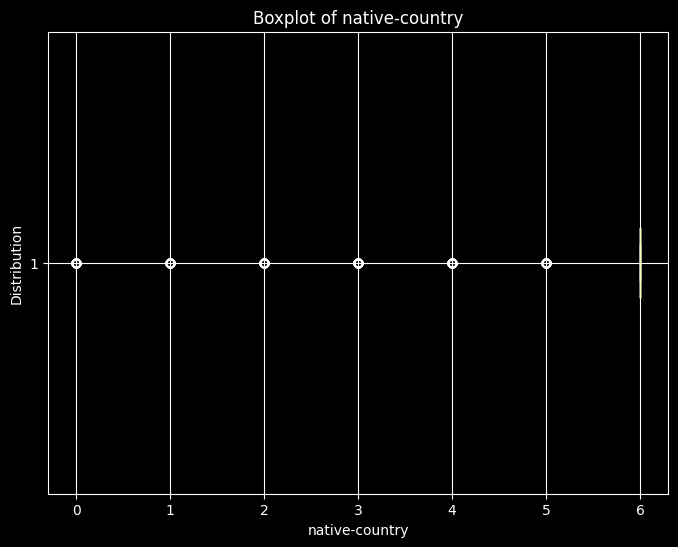

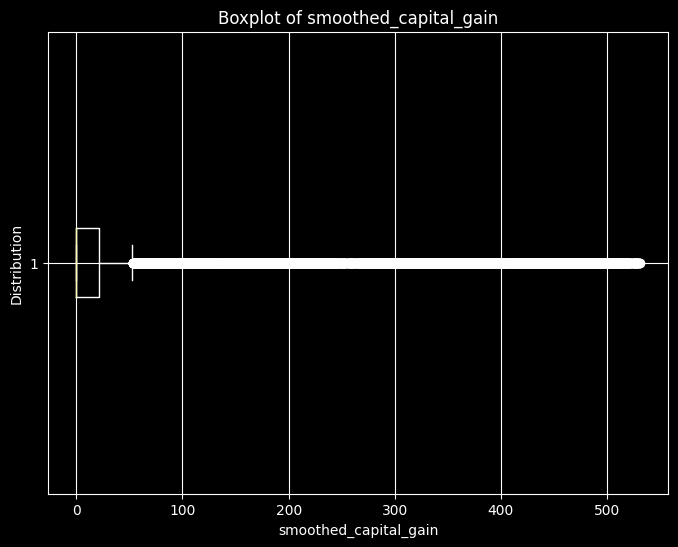

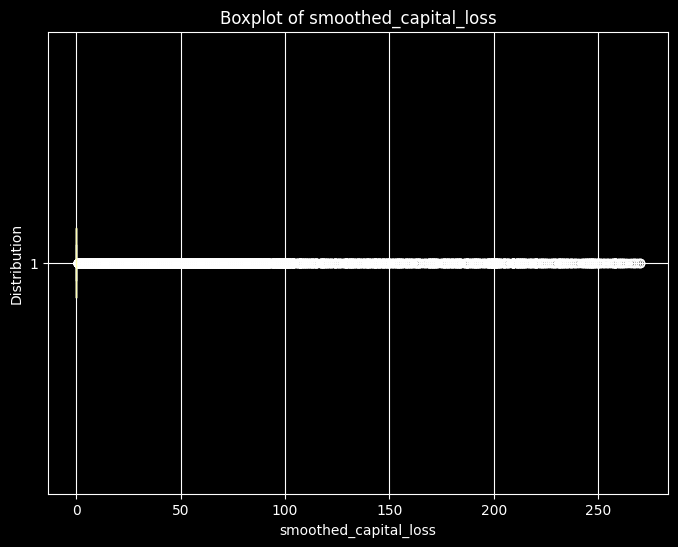

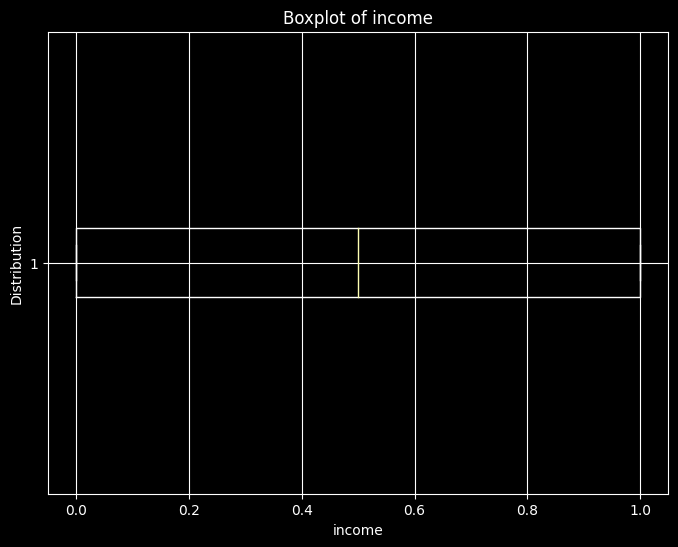

In [93]:
for column in resampled_df.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(resampled_df[f'{column}'], vert=False)
  plt.title(f'Boxplot of {column}')
  plt.xlabel(f'{column}')
  plt.ylabel('Distribution')
  plt.grid(True)
  plt.show()

# **Random Forest Classifier**

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)


train_predictions = rf_classifier.predict(x_train)

# Predict on the testing set
y_pred = rf_classifier.predict(x_test)

# classification reports
print("\n classification_report of the training")
print(classification_report(y_train, train_predictions))

# print("Training Accuracy:", training_accuracy)
print("\n classification_report of the testing")
print(classification_report(y_test,y_pred))


# Evaluate the model
training_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", training_accuracy*100)

accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy*100)


 classification_report of the training
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     28423
           1       0.94      0.93      0.93     28377

    accuracy                           0.93     56800
   macro avg       0.93      0.93      0.93     56800
weighted avg       0.93      0.93      0.93     56800


 classification_report of the testing
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7077
           1       0.87      0.86      0.86      7123

    accuracy                           0.86     14200
   macro avg       0.86      0.86      0.86     14200
weighted avg       0.86      0.86      0.86     14200

Training Accuracy: 93.2693661971831
Testing Accuracy: 86.15492957746478
